In [1]:
# Calcula un índice por país de exposición al cambio climático 

# Importamos librerías
import os
import numpy as np
import pandas as pd
from scipy import stats
import xarray as xr
import geopandas as gpd
import xesmf as xe
import rioxarray as rio
import geoviews as gv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
# Coloca la barra de color horizontal y abajo
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "lightgray", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }

pd.options.display.float_format = '{:,.1f}'.format

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"
wb_path = "../../Bases_de_datos/CCKP_NetCDF/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]
borders["Area"] = borders.to_crs(8857).area

# Relación código-número de país
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)

# Contorno de países
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.4, color = "k" )

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Nombres de índicadores relevantes por país
yhist = "1995-2014, historical"
yfut = "2040-2059, SSP2-4.5"
c_names = [
    f"Total population, {yhist}",
    f"Total population, {yfut}",
    f"Sea level rise exposed population, 100-year coastal flood plain, 2000, historical",
    f"Sea level rise % exposed population, 100-year coastal flood plain, 2000, historical",
    f"Sea level rise exposed population, 100-year coastal flood plain, 2060, SSP2-4.5",
    f"Sea level rise % exposed population, 100-year coastal flood plain, 2060, SSP2-4.5",
    f"Drought exposed population, Average 12-month SPEI below -0.15, {yhist}",
    f"Drought % exposed population, Average 12-month SPEI below -0.15, {yhist}",
    f"Drought exposed population, Average 12-month SPEI below -0.15, {yfut}",
    f"Drought % exposed population, Average 12-month SPEI below -0.15, {yfut}",
    f"Extreme temperature exposed population, more than 12 weeks of daily mean temperature above 35°C per year, {yhist}",
    f"Extreme temperature % exposed population, more than 12 weeks of daily mean temperature above 35°C per year, {yhist}",
    f"Extreme temperature exposed population, more than 12 weeks of daily mean temperature above 35°C per year, {yfut}",
    f"Extreme temperature % exposed population, more than 12 weeks of daily mean temperature above 35°C per year, {yfut}",
    f"Extreme rainfall exposed population, average 1-day maximum rainfall above 10% of average annual rainfall, {yhist}",
    f"Extreme rainfall % exposed population, average 1-day maximum rainfall above 10% of average annual rainfall, {yhist}",
    f"Extreme rainfall exposed population, average 1-day maximum rainfall above 10% of average annual rainfall, {yfut}",
    f"Extreme rainfall % exposed population, average largest 1-day rainfall above 10% of average annual rainfall, {yfut}",
    f"Hurricane exposed population, 100-year wind above category 4, {yhist}",
    f"Hurricane % exposed population, 100-year wind above category 4, {yfut}",
    f"Hurricane exposed population, 100-year wind above category 4 {yhist}",
    f"Hurricane % exposed population, 100-year wind above category 4, {yfut}n"
    ]

# Nombres de índices
index_n = [
    "Sea level rise exposure index",
    "Drought exposure index",
    "Extreme heat exposure index",
    "Extreme rainfall exposure index",
    "Hurricane exposure index",
    "Climate change exposure index"
    ]

In [3]:
# Funciones a utilizar

# Calcula la exposición
def exposicion(v, tr, var_i, pop_i, df_pop_i):
    # variables
    # v       : nombre de la variable
    # tr      : umbral de valor extremo
    # var_i   : Dataset de la variable
    # pop_i   : Dataset de la población
    # df_pop_i: Dataframe de la población
    #
    # regresa
    # df_ic   : Dataframe con valores por país
    # ds_i    : Dataset con datos espaciales

    ds_i = var_i.copy()
    # Calculamos el peligro extremo
    if v == "climatology-spei12-annual-mean":
        ds_i["Hotspots"] = ds_i[v].where( ds_i[v] <= tr, 0 )
    else:
        ds_i["Hotspots"] = ds_i[v].where( ds_i[v] >= tr, 0 )
    ds_i["Hotspots"] = ds_i["Hotspots"].where( ds_i["Hotspots"] == 0, 1 )
    # Calculamos la exposición espacial
    ds_i["Exposure index"] = pop_i[p] * ds_i[v]
    ds_i["Exposed population"] = pop_i[p] * ds_i["Hotspots"]
    df_i = ds_i[ ["Exposed population", "Exposure index"] ].to_dataframe()
    # Población de cada celda
    df_i[p] = df_pop_i[p]
    # País de cada celda
    df_i["country"] = df_pop_i["country"]
    df_i = df_i.reset_index().set_index("country")
    df_i = df_i[ ~df_i.index.isnull() ]
    # Exposición por país
    df_ic = df_i[ [p, "Exposed population", "Exposure index"]
        ].groupby("country").sum()
    df_ic["% Exposed population"] = (
        100 * df_ic["Exposed population"] / df_ic[p] )
    df_ic["% Exposure index"] = ( 100 * df_ic["Exposure index"] / df_ic[p] )
    # Asignamos el código de país correspondiente
    # names es variable global
    df_ic[ix] = names[ix]
    df_ic = df_ic.reset_index().set_index(ix)
    
    return df_ic, ds_i

# Calcula el índice
def indice(v, vn, j, df_hc, df_fc):
    # v    : nombre original de la variable
    # vn   : nombre de la variable a utilizar
    # j    : indica la posición del nombre de
    #        las variables en la lista c_names
    # df_hc: datos históricos
    # df_fc: datos futuros

    #df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]
    df_fc[vn] = df_fc["% Exposure index"] - df_hc["% Exposure index"]
    if v == "climatology-spei12-annual-mean": df_fc[vn] *= -1

    # Guardamos los valores relevantes por país
    df_iso[c_names[j]] = df_hc["Exposed population"]
    df_iso[c_names[j+1]] = df_hc["% Exposed population"]
    df_iso[c_names[j+2]] = df_fc["Exposed population"]
    df_iso[c_names[j+3]] = df_fc["% Exposed population"]

    # Solo se toman valores donde aumenta la exposición
    # df_iso es variable global
    df_iso[vn] = df_fc[vn].astype(np.float64)
    df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
    # Normalización 0-10
    df_iso.loc[ df_iso[vn] > 0 ,vn] = stats.percentileofscore(
        df_iso.loc[ df_iso[vn] > 0 ,vn], df_iso.loc[ df_iso[vn] > 0 ,vn],
        nan_policy = "omit" ) / 10

# Función de mapa de variable espacial
def do_map(v, vn, var_h, var_f, vn_plot_1, vn_plot_2, cmap):
    # v        : nombre original de la variable
    # vn       : nombre de la variable a utilizar
    # var_h    : Dataset con valores históricos
    # var_f    : Dataset con valores futuros
    # vn_plot_1: nombre de mapa de cambio e índice
    # vn_plot_2: nombre de mapa de variable
    # cmap     : paleta de colores a utiliza

    # Histórico
    # Nombre en mapa
    vn_plot_h = vn_plot_2 + ", 1995-2014"
    ds_map_h = var_h.rename( {v: vn_plot_h } )
    # Recortamos a zona terrestre
    ds_map_h[vn_plot_h] = ds_map_h[vn_plot_h].fillna(0)
    ds_map_h = ds_map_h.rio.write_crs(borders.crs)
    ds_map_h = ds_map_h.rio.set_spatial_dims("lon", "lat")
    ds_map_h = ds_map_h.rio.clip( borders.dissolve().geometry,
        drop = False, invert = False, all_touched = True )
    # Futuro
    # Nombre en mapa
    vn_plot_f = vn_plot_2 + ", 2040-2059, SSP2-4.5"
    ds_map_f = var_f.rename( {v: vn_plot_f } )
    # Recortamos a zona terrestre
    ds_map_f[vn_plot_f] = ds_map_f[vn_plot_f].fillna(0)
    ds_map_f = ds_map_f.rio.write_crs(borders.crs)
    ds_map_f = ds_map_f.rio.set_spatial_dims("lon", "lat")
    ds_map_f = ds_map_f.rio.clip( borders.dissolve().geometry,
        drop = False, invert = False, all_touched = True )
    
    # Mapa de variable climática
    # Rangos de paleta de colores
    min_v = min( np.floor( np.nanmin(ds_map_h[vn_plot_h].values) ),
        np.floor( np.nanmin(ds_map_f[vn_plot_f].values) ) )
    max_v = max( np.ceil( np.nanmax(ds_map_h[vn_plot_h].values) ),
        np.ceil( np.nanmax(ds_map_f[vn_plot_f].values) ) )
    # Mapa histórico
    v_map_h = gv.Image( gv.Dataset( ds_map_h, ["lon", "lat"],
        vdims = gv.Dimension(vn_plot_h, range = ( min_v, max_v ) ) )
        ).opts( cmap = cmap, **options )
    map = ( v_map_h * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )
    # Mapa futuro
    v_map_f = gv.Image( gv.Dataset( ds_map_f, ["lon", "lat"],
        vdims = gv.Dimension(vn_plot_f, range = ( min_v, max_v ) ) )
        ).opts( cmap = cmap, **options )
    map = ( v_map_f * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )

    # Mapa de puntos que exceden el umbral
    # Cambio
    ds_map_h["Hotspot change"] = ds_map_f["Hotspots"] - ds_map_h["Hotspots"]
    # Mapa histórico
    vn_plot_h = vn_plot_1 + ", 1995-2014"
    ds_map_h["Hotspots"] = ds_map_h[ "Hotspots"
        ].where( ds_map_h["Hotspots"] == 1, 0.9 )
    v_map_h = gv.Image( gv.Dataset( ds_map_h, ["lon", "lat"],
        vdims = gv.Dimension("Hotspots", range = ( 0, 1 ) ) )
        ).opts( colorbar = False, cmap = "Paired",
        ylim = (-62,85), xlim = (-180,180), title = vn_plot_h )
    map = ( v_map_h * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )
    # Mapa futuro
    vn_plot_f = vn_plot_1 + ", 2040-2059, SSP2-4.5"
    ds_map_f["Hotspots"] = ds_map_f[ "Hotspots"
        ].where( ds_map_f["Hotspots"] == 1, 0.9 )
    v_map_f = gv.Image( gv.Dataset( ds_map_f, ["lon", "lat"],
        vdims = gv.Dimension("Hotspots", range = ( 0, 1 ) ) )
        ).opts( colorbar = False, cmap = "Paired",
        ylim = (-62,85), xlim = (-180,180), title = vn_plot_f )
    map = ( v_map_f * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )
    # Mapa de cambio
    vn_plot_c = vn_plot_1 + ", change 2005-2050"
    v_map_h = gv.Image( gv.Dataset( ds_map_h, ["lon", "lat"],
        vdims = gv.Dimension("Hotspot change", range = ( -1, 1 ) ) )
        ).opts( colorbar = False, cmap = "bwr",
        ylim = (-62,85), xlim = (-180,180), title = vn_plot_c )
    map = ( v_map_h * ocean * countries ).opts( **options_m )
    gv.output( map, size = 600 )

    # Mapa de índice
    # Variables globales
    borders[vn] = df_iso[vn]
    map_v = gv.Polygons( borders, vdims = vn ).opts( **options_r )
    map = ( ocean * map_v ).opts( **options_m )
    gv.output( map, size = 600 )

# Mejora el formato de las tablas para su uso en documentos.
def display(vn, n, category = "", type = "category"):
    # vn:       variable principal
    # n:        indica la posición del nombre de
    #           las variables en la lista c_names
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    #
    # disp:     regresa un objeto Display de Pandas
    #           basado en la tabla de entrada

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "climate":
        disp = df_iso[["name"] + index_n].sort_values(
            vn, ascending = False ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df_iso[["name", vn] + c_names[n:n+4]].sort_values(
            vn, ascending = False ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = False).head(5)["name"].values )
    print(f"Most exposed countries: {', '.join(c_list)}")

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "climate":
                disp.iloc[r, 1:] = df_iso.loc[ df_iso[cat], index_n].mean()
            # Una variable principal
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[df_iso[cat], vn].mean()
                disp.iloc[r, 2] = df_iso.loc[df_iso[cat], c_names[n]].sum()
                disp.iloc[r, 3] = np.float32( 100 * disp.iloc[r, 2]
                    / df_iso.loc[df_iso[cat], c_names[0]].sum() )
                disp.iloc[r, 4] = df_iso.loc[df_iso[cat], c_names[n+2]].sum()
                disp.iloc[r, 5] = np.float32( 100 * disp.iloc[r, 4]
                    / df_iso.loc[df_iso[cat], c_names[1]].sum() )
            c_list = list( df_iso.loc[df_iso[cat], ["name", vn]
                ].sort_values(vn, ascending = False
                ).head(5)["name"].values )
            print(f"Most exposed {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "climate":
                disp.iloc[r, 1:] = df_iso.loc[
                    df_iso["region"] == cat, index_n].mean()
            # Una variable principal
            elif type == "category":
                disp.iloc[r, 1] = df_iso.loc[
                    df_iso["region"] == cat, vn].mean()
                disp.iloc[r, 2] = df_iso.loc[
                    df_iso["region"] == cat, c_names[n]].sum()
                disp.iloc[r, 3] = np.float32( 100 * disp.iloc[r, 2]
                    / df_iso.loc[df_iso["region"] == cat, c_names[0]].sum() )
                disp.iloc[r, 4] = df_iso.loc[
                    df_iso["region"] == cat, c_names[n+2]].sum()
                disp.iloc[r, 5] = np.float32( 100 * disp.iloc[r, 4]
                    / df_iso.loc[df_iso["region"] == cat, c_names[1]].sum() )

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "climate":
        disp.iloc[r, 1:] = df_iso[index_n].mean()
    # Una variable principal
    elif type == "category":
        disp.iloc[r, 1] = df_iso[vn].mean()
        disp.iloc[r, 2] = df_iso[c_names[n]].sum()
        disp.iloc[r, 3] = np.float32( 100 * disp.iloc[r, 2]
            / df_iso[c_names[0]].sum() )
        disp.iloc[r, 4] = df_iso[c_names[n+2]].sum()
        disp.iloc[r, 5] = np.float32( 100 * disp.iloc[r, 4]
            / df_iso[c_names[1]].sum() )
    
    # Renombramos columnas
    # Resumen de variables
    if   type == "climate":
        cols = ["Name"] + index_n
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category} index",
            "Historical exposed population", "Historical % exposed population",
            "Projected exposed population", "Projected % exposed population" ]
    disp.columns = cols


    # Resumen de variables
    if   type == "climate":
        disp = disp.style.format( { cols[1]: "{:.1f}", cols[2]: "{:.1f}",
            cols[3]: "{:.1f}",cols[4]: "{:.1f}", cols[5]: "{:.1f}",
            cols[6]: "{:.1f}"  } )
    # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: "{:.1f}", cols[2]: "{:,.0f}",
            cols[3]: "{:.1f}",cols[4]: "{:,.0f}", cols[5]: "{:.1f}" } )

    # Regresamos la tabla
    return disp

In [4]:
# Población por país
p = "climatology-popcount-annual-mean"
v_path_h = ( p + "_pop-x0.25_gpw-v4-rev11-"
    + "historical_climatology_mean_1995-2014.nc" )
v_path_f = ( p + "_pop-x0.25_gpw-v4-rev11-"
    + "ssp245_climatology_mean_2040-2059.nc" )

# Datos históricos
# Cargamos datos
i = 4
pop_h = xr.open_dataset(wb_path + v_path_h)
pop_h[p] = pop_h[p].isel(time = 0)
pop_h = pop_h.rio.write_crs(borders.crs)
# Preparamos variable de país
pop_h["country"] = pop_h[p].copy()

# Países grandes
gdf_b = borders[borders["Area"] >= 1e9]
# Países chicos
gdf_s = borders[borders["Area"] < 1e9]

# Recortamos el NetCDF con las geometrías de los países
# y le asignamos el número de país a cada celda
# Iteramos para países grandes
for i in gdf_b.index:
    # Malla con número de país
    ds_c = xr.full_like( pop_h[[p]],
        int(gdf_b.loc[gdf_b.index == i, "ISO_N3_EH"].iloc[0]) )
    # Recortamos la forma del país
    # Solo contamos las celdas que caen dentro del país
    pop_w = ds_c.rio.clip( gdf_b[gdf_b.index == i].geometry,
        drop = False, invert = False,all_touched = False )
    # Asignamos a la malla general
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

# Se asigna el país de la celda adyacente a las
# celdas costeras que no cayeron dentro de un país
# Malla original
iso = pop_h["country"].values.copy()
# Malla donde asignaremos a celdas adyacentes
iso_c  = iso.copy()
# Se repite dos veces para maximizar la cantidad de celdas que aignamos
for l in range(2):
    # Iteramos para cada celda
    for i in range(iso.shape[0]):
        for j in range(iso.shape[1]):

            # Índices de celdas adyacentes
            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            # Malla cíclica
            if i_l < 0: i_l = iso.shape[0] - 1
            if i_p == iso.shape[0]: i_p = 0
            if j_l < 0: j_l = iso.shape[1] - 1
            if j_p == iso.shape[1]: j_p = j

            # Celdas adyacentes
            adj = [0] * 8
            adj[0] = iso[i_l, j_p]
            adj[1] = iso[i, j_p]
            adj[2] = iso[i_p, j_p]
            adj[3] = iso[i_l, j]
            cell   = iso[i, j]
            adj[4] = iso[i_p, j]
            adj[5] = iso[i_l, j_l]
            adj[6] = iso[i, j_l]
            adj[7] = iso[i_p, j_l]

            # Ignoramos mar y celdas que ya tienen asignado un país.
            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                # Verificamos los países adyacentes a la celda
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                # Asignamos el país más común entre los adyacentes
                if len(adj_c) > 0:
                    m = stats.mode(adj_c)[0]
                    if not (type(m) == np.float32): m = m[0]
                    iso_c[i, j] = int(m)

# Malla con los valores adyacentes corregidos
pop_h["country"] = ( ("lat", "lon"), iso_c )

# Recortamos el NetCDF con las geometrías de los países
# y le asignamos el número de país a cada celda
# Iteramos para países chicos
for i in gdf_s.index:
    # Malla con número de país
    ds_c = xr.full_like( pop_h[["climatology-popcount-annual-mean"]],
        int(gdf_s.loc[gdf_s.index == i, "ISO_N3_EH"].iloc[0]) )
    # Recortamos la forma del país
    # Contamos  todas las celdas que tocan el país
    pop_w = ds_c.rio.clip( gdf_s[gdf_s.index == i].geometry,
        drop = False, invert = False, all_touched = True )
    # Asignamos a la malla general
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

# Se asigna el país de la celda adyacente a las
# celdas costeras que no cayeron dentro de un país
# Malla original
iso = pop_h["country"].values.copy()
# Malla donde asignaremos a celdas adyacentes
iso_c  = iso.copy()
# Se repite dos veces para maximizar la cantidad de celdas que aignamos
for l in range(2):
    # Iteramos para cada celda
    for i in range(iso.shape[0]):
        for j in range(iso.shape[1]):

            # Índices de celdas adyacentes
            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            # Malla cíclica
            if i_l < 0: i_l = iso.shape[0] - 1
            if i_p == iso.shape[0]: i_p = 0
            if j_l < 0: j_l = iso.shape[1] - 1
            if j_p == iso.shape[1]: j_p = j

            # Celdas adyacentes
            adj = [0] * 8
            adj[0] = iso[i_l, j_p]
            adj[1] = iso[i, j_p]
            adj[2] = iso[i_p, j_p]
            adj[3] = iso[i_l, j]
            cell   = iso[i, j]
            adj[4] = iso[i_p, j]
            adj[5] = iso[i_l, j_l]
            adj[6] = iso[i, j_l]
            adj[7] = iso[i_p, j_l]

            # Ignoramos mar y celdas que ya tienen asignado un país.
            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                # Verificamos los países adyacentes a la celda
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                # Asignamos el país más común entre los adyacentes
                if len(adj_c) > 0:
                    m = stats.mode(adj_c)[0]
                    if not (type(m) == np.float32): m = m[0]
                    iso_c[i, j] = int(m)
                # En la última iteración eliminamos celdas aisladas
                elif l == 1: iso_c[i, j] = np.nan

# Malla con los valores adyacentes corregidos
pop_h["country"] = ( ("lat", "lon"), iso_c )

# Guardamos
pop_h.to_netcdf(path_r + "countries.nc")
# Pasamos a tabla
df_pop_h = pop_h[ [p, "country"] ].to_dataframe(
    ).drop(columns = ["spatial_ref"] )

# Datos futuros
# Cargamos datos
i = 1
pop_f = xr.open_dataset(wb_path + v_path_f)
pop_f[p] = pop_f[p].isel(time = 0)
# Pasamos a tabla
df_pop_f = pop_f[ [p] ].to_dataframe()
# Asignamos la malla de país histórica
# Asumimos que no hay cambios de celdas marítimas a terrestres
df_pop_f["country"] = df_pop_h["country"]

# Sumamos la población de las celdas de cada país
df_iso = df_iso.reset_index().set_index("country-code")
df_iso[c_names[0]] = df_pop_h.groupby("country").sum()
df_iso[c_names[1]] = df_pop_f.groupby("country").sum()
df_iso = df_iso.reset_index().set_index(ix) 

# Guardamos la población
pop_h.drop_vars( ["bnds", "spatial_ref", "lat_bnds", "lon_bnds", "time"]
    ).rename_vars( {p:"population"}
    ).to_netcdf("../share/Population/population_1995_2014.nc")
pop_f["country"] = pop_h["country"]
pop_f.drop_vars( ["bnds", "spatial_ref", "lat_bnds", "lon_bnds", "time"]
    ).rename_vars( {p:"population"}
    ).to_netcdf("../share/Population/population_2040_2059_SSP245.nc")

# 10 países más altos
df_iso[["name", c_names[0]]].sort_values(
    c_names[0], ascending = False).head(10)
print(f"Historical total: {df_iso[c_names[0]].sum():,.0f}")
print(f"    Future total: {df_iso[c_names[1]].sum():,.0f}")

Historical total: 6,468,838,912
    Future total: 9,128,403,968


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Sea level rise exposure index)
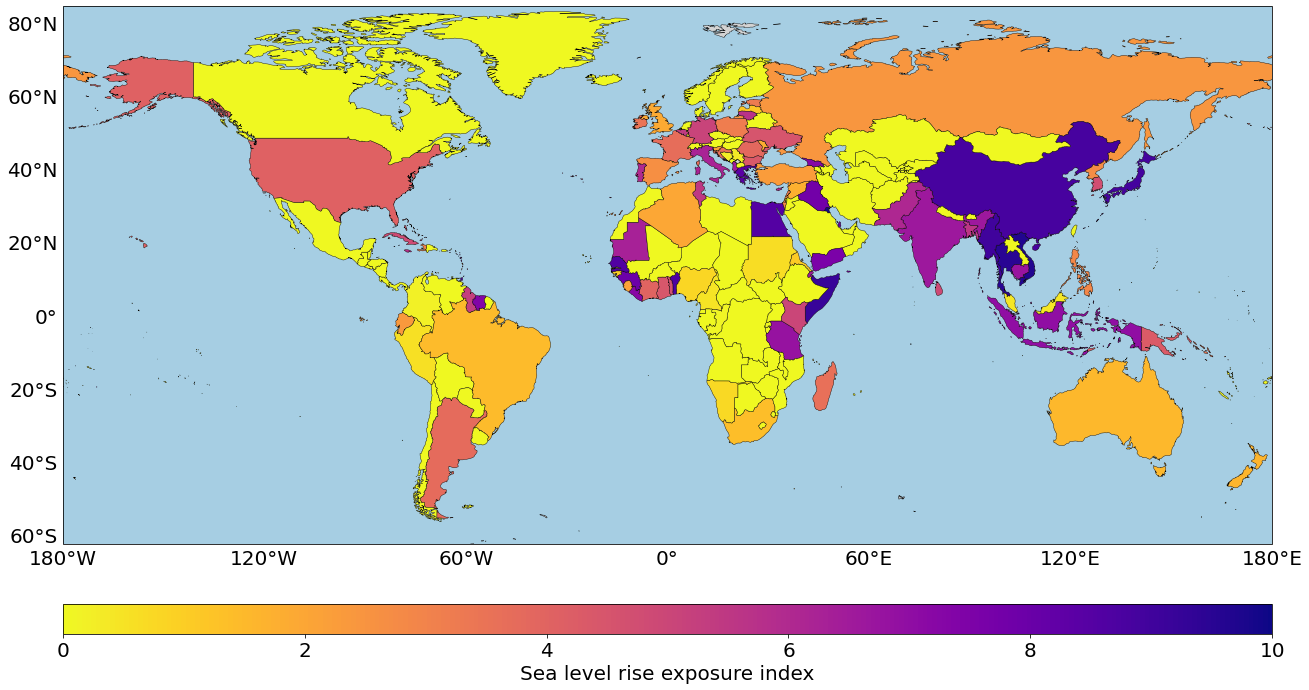

Most exposed countries: Monaco, Kuwait, Macao, Aruba, Viet Nam
Most exposed SIDS: Aruba, Montserrat, Anguilla, Bermuda, Trinidad and Tobago
Most exposed LDC: Somalia, Myanmar, Benin, Senegal, Guinea
Most exposed LLDC: Moldova, Republic of, Afghanistan, Armenia, Zambia, Uzbekistan


In [5]:
# Ïndice de nivel del mar

id = "pone.0118571.s004"
v = "Flood plain population"
# Datos relevantes por país
col = [
    "Major area, region, country or area",
    "Baseline - total population 2000 [thousand]",
    "Baseline - Flood plain population 2000",
    "Scenario D - Total population 2060 [thousand]",
    "Scenario D - Flood plain population 2060",
    ]

# Cargamos el archivo
df_hc = pd.read_csv( "../../"
    + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = "alpha-3", )
df_hc = df_hc.loc[ df_hc.index != "-99", col ]
df_fc = df_hc.copy()

# Porcentaje de población expuesta
df_hc["Exposed population"] = df_hc["Baseline - Flood plain population 2000"]
df_fc["Exposed population"] = df_fc["Scenario D - Flood plain population 2060"]
df_hc["% Exposed population"] = 100 * df_hc[col[2]] / ( df_hc[col[1]] * 1000 )
df_fc["% Exposed population"] = 100 * df_fc[col[4]] / ( df_fc[col[3]] * 1000 )
df_hc["Exposure index"]   = df_hc["Exposed population"]
df_hc["% Exposure index"] = df_hc["% Exposed population"]
df_fc["Exposure index"]   = df_fc["Exposed population"]
df_fc["% Exposure index"] = df_fc["% Exposed population"]

# Cálculo del índice
vn = index_n[0]
n = 2
indice(v, vn, 2, df_hc, df_fc)

# Mapa
borders[vn] = df_iso[vn]
map_v = gv.Polygons( borders, vdims = vn ).opts( **options_r )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países más altos
disp = display(vn, n, "Sea level rise")
disp

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 12-month SPEI, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
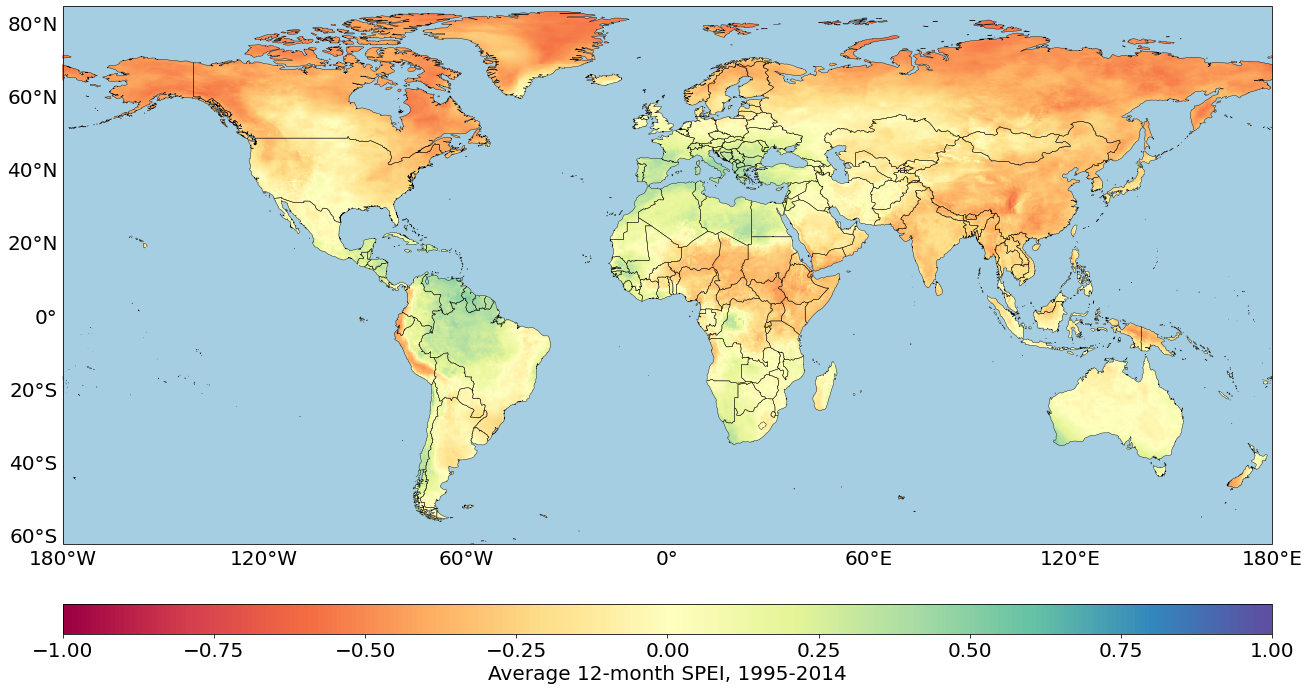

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 12-month SPEI, 2040-2059, SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
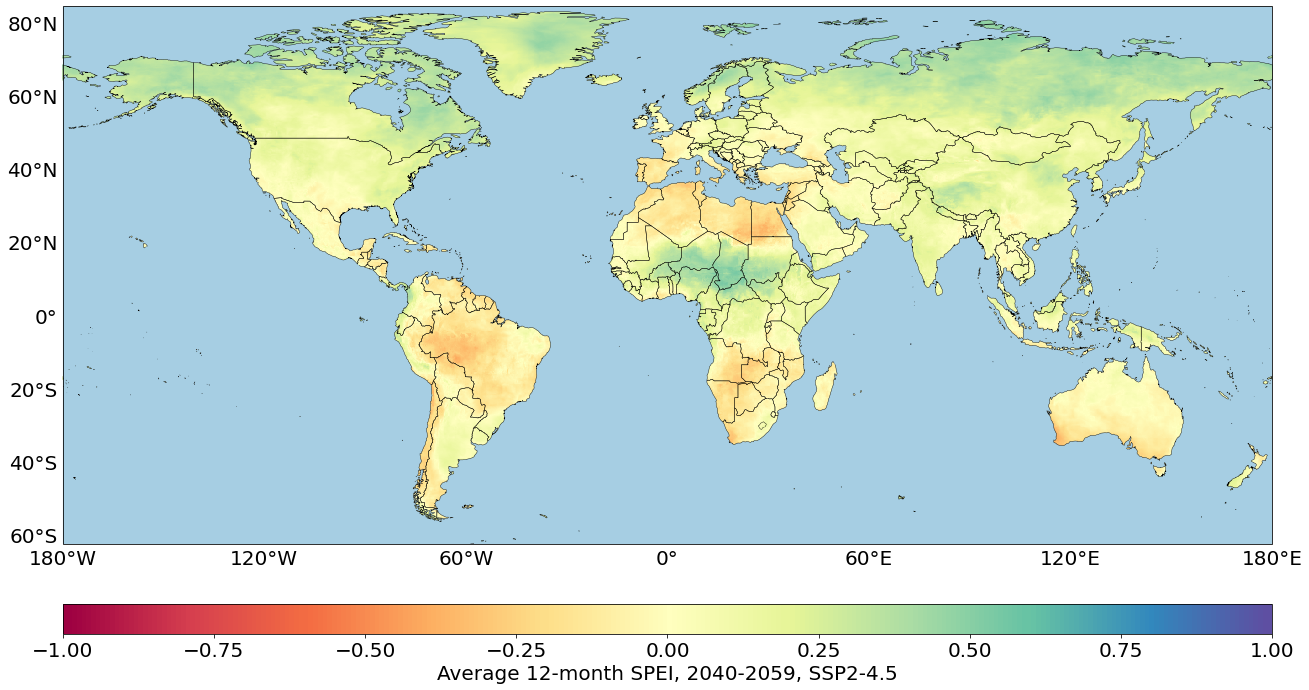

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
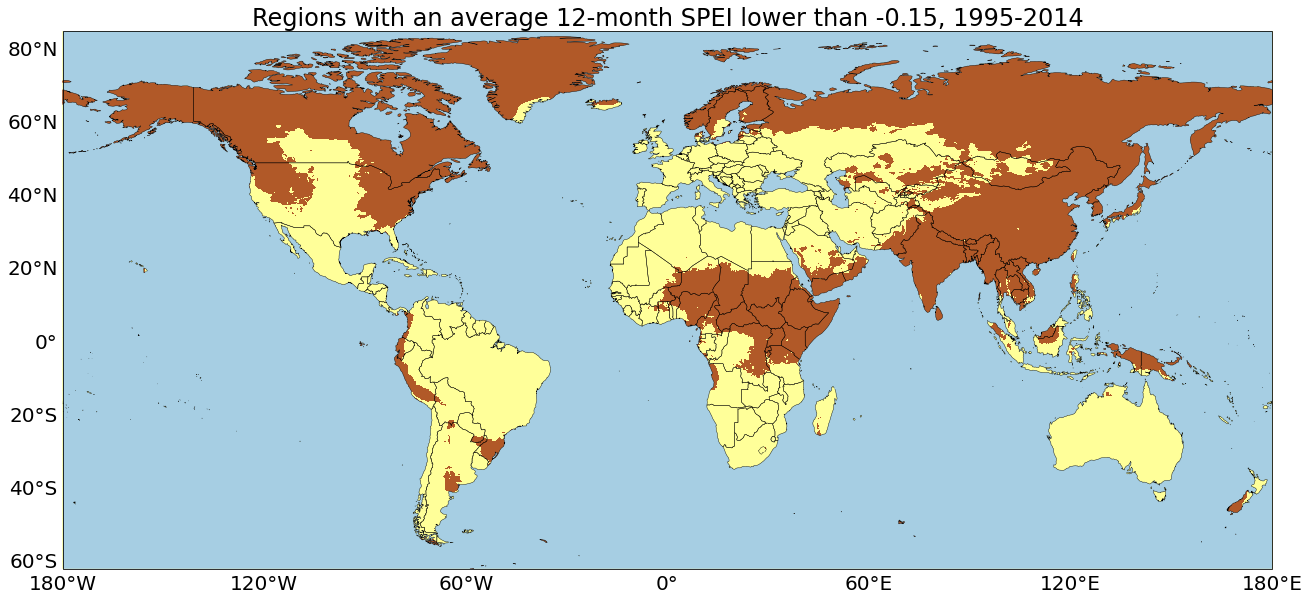

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
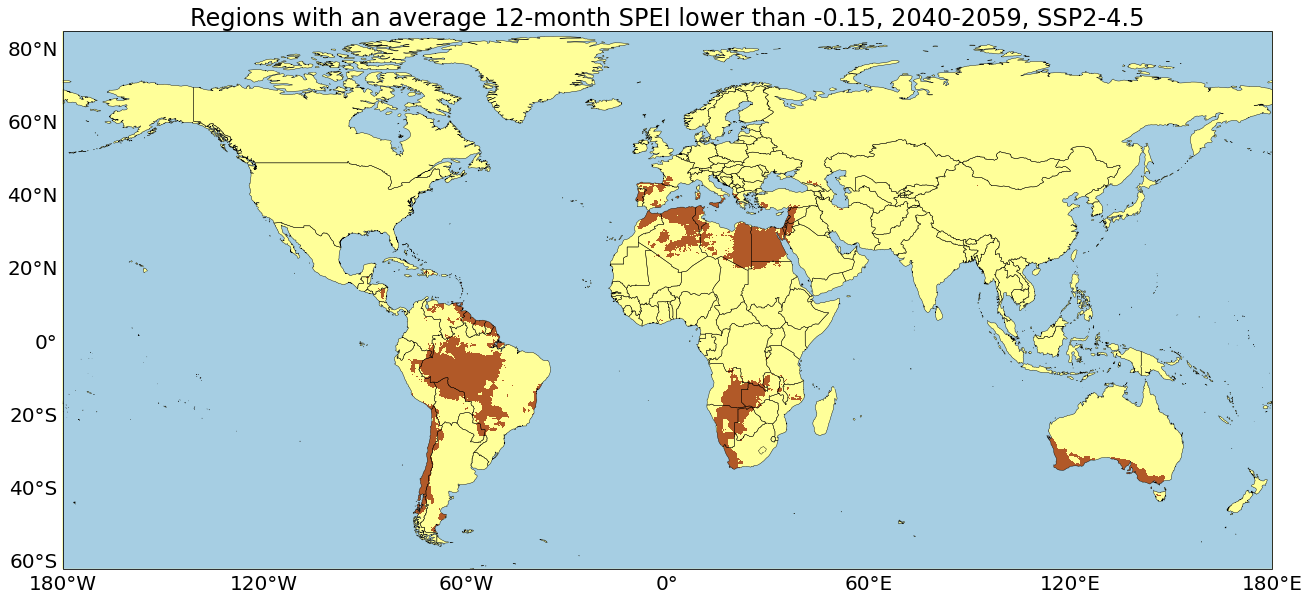

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspot change)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
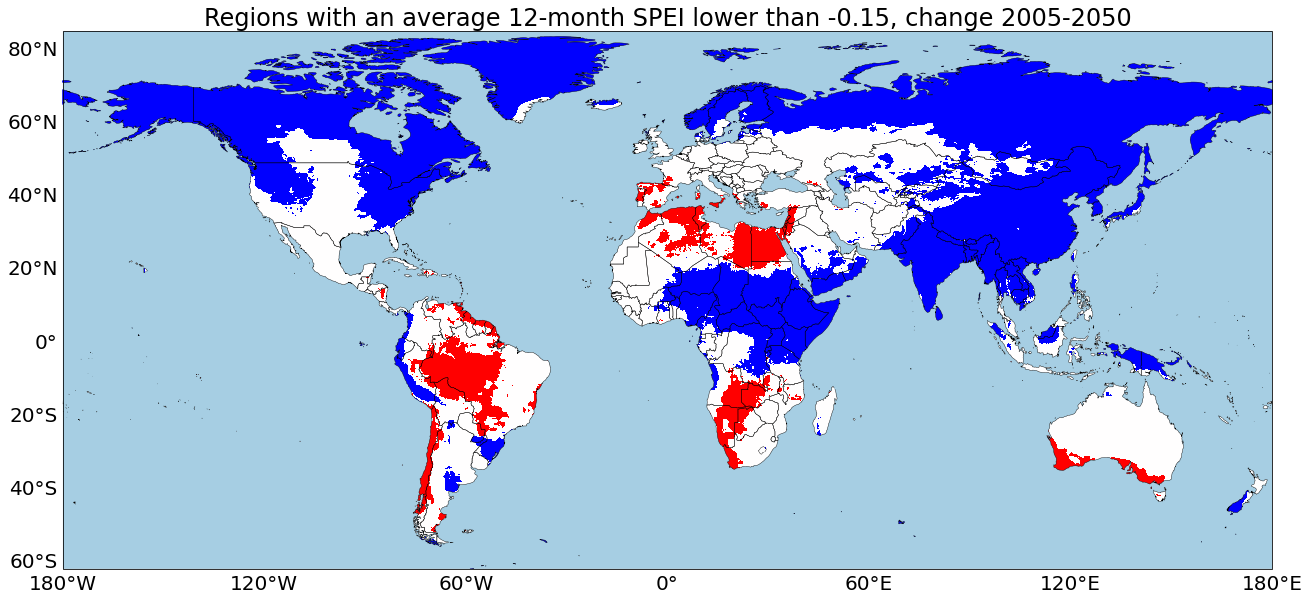

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Drought exposure index)
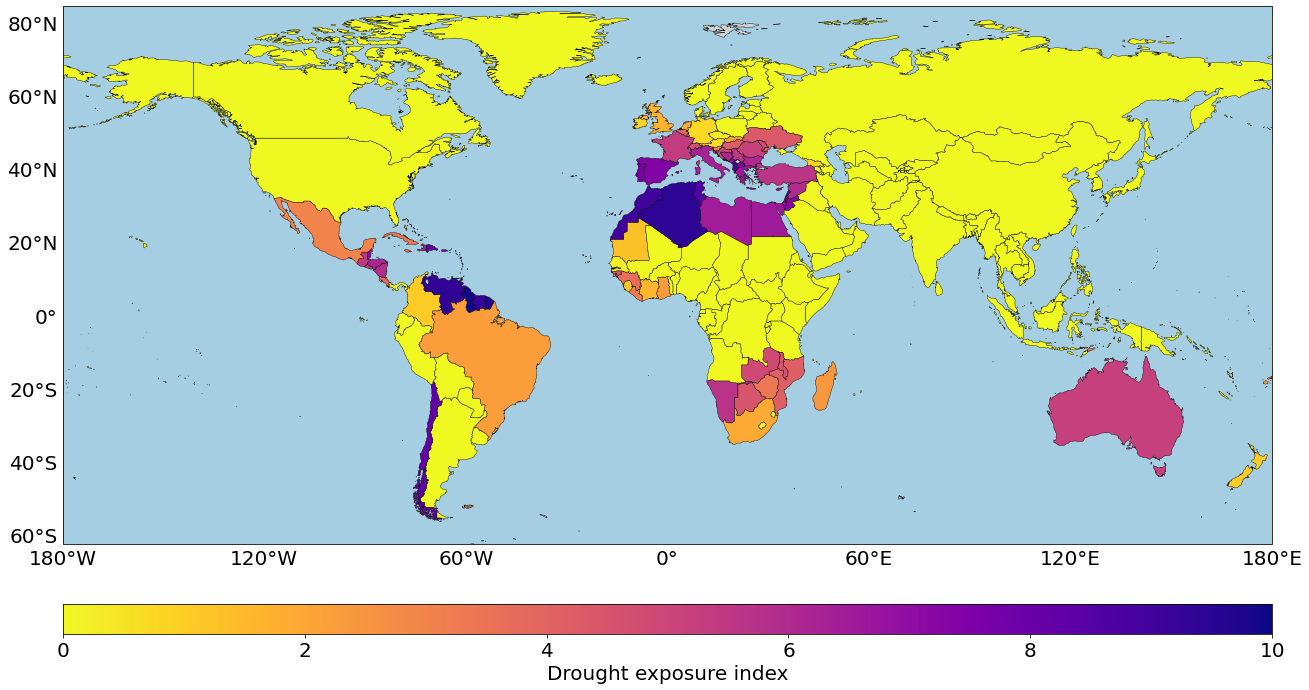

Most exposed countries: Trinidad and Tobago, Guyana, Saint Vincent and the Grenadines, Martinique, French Guiana
Most exposed SIDS: Trinidad and Tobago, Guyana, Saint Vincent and the Grenadines, Martinique, Saint Lucia
Most exposed LDC: Haiti, Zambia, Malawi, Guinea-Bissau, Mozambique
Most exposed LLDC: North Macedonia, Zambia, Moldova, Republic of, Malawi, Botswana


In [6]:
# Ïndice de sequía
v = "climatology-spei12-annual-mean"
v_path_h = ( v + "_cmip6-x0.25_ensemble-all-"
    + "historical_climatology_median_1995-2014.nc" )
v_path_f = ( v + "_cmip6-x0.25_ensemble-all-"
    + "ssp245_climatology_median_2040-2059.nc" )
# Umbral de valor extremo
tr = -0.15

# Datos históricos
# Cargamos datos
i = 2
ds_h = xr.open_dataset(wb_path + v_path_h)
ds_h[v] = ds_h[v].isel(time = 0)
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_hc, var_h = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 11
ds_f = xr.open_dataset(wb_path + v_path_f)
ds_f[v] = ds_f[v].isel(time = 0)
var_f = ds_f.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_fc, var_f = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[1]
n = 6
indice(v, vn, n, df_hc, df_fc)

# Mapas
vn_plot_1 = "Regions with an average 12-month SPEI lower than -0.15"
vn_plot_2 = "Average 12-month SPEI"
do_map(v, vn, var_h, var_f, vn_plot_1, vn_plot_2, "spectral")

# Guardamos los datos en malla
var_h.rename_vars( {v: "SPEI-12"} ).drop_vars(
    ["time", "bnds", "spatial_ref"] ).to_netcdf(
    "../share/Climate/Drought_1995_2014.nc" )
var_f.rename_vars( {v: "SPEI-12"} ).drop_vars(
    ["time", "bnds", "spatial_ref"] ).to_netcdf(
    "../share/Climate/Drought_2040_2059_SSP245.nc" )

# Países más altos
disp = display(vn, n, "Drought")
disp

:Overlay
   .Image.I    :Image   [lon,lat]   (Number of days exceeding 35°C, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
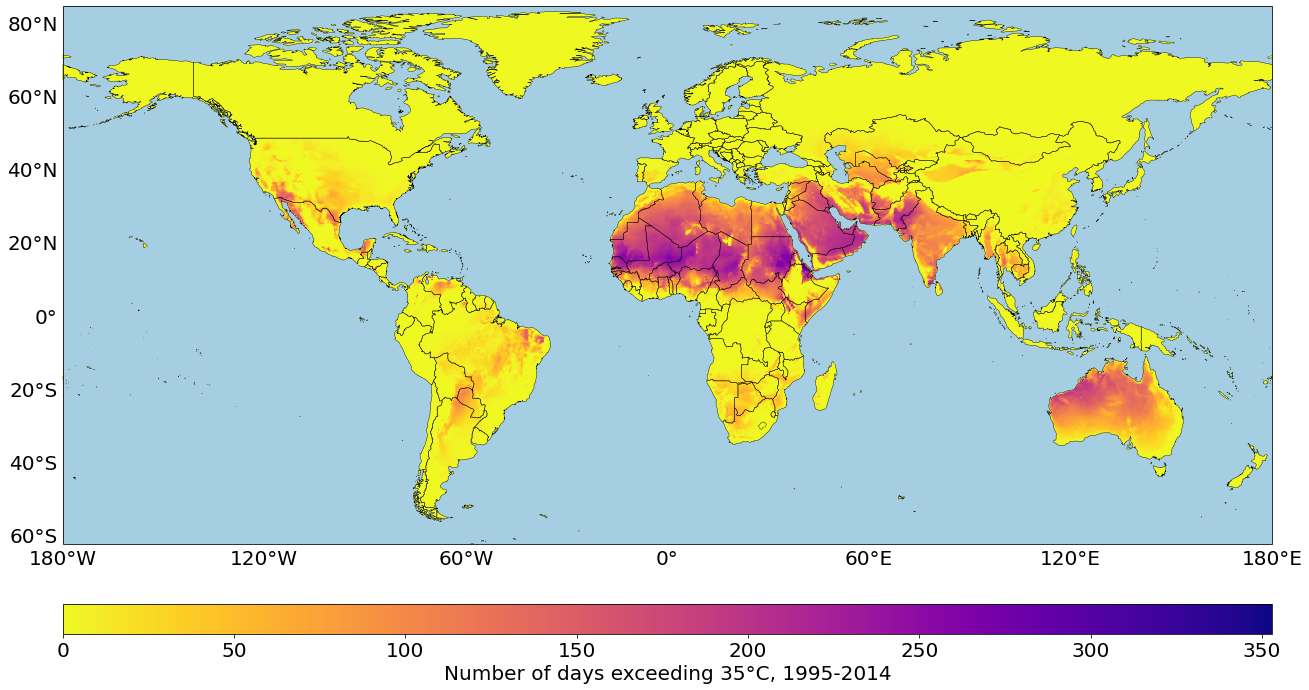

:Overlay
   .Image.I    :Image   [lon,lat]   (Number of days exceeding 35°C, 2040-2059, SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
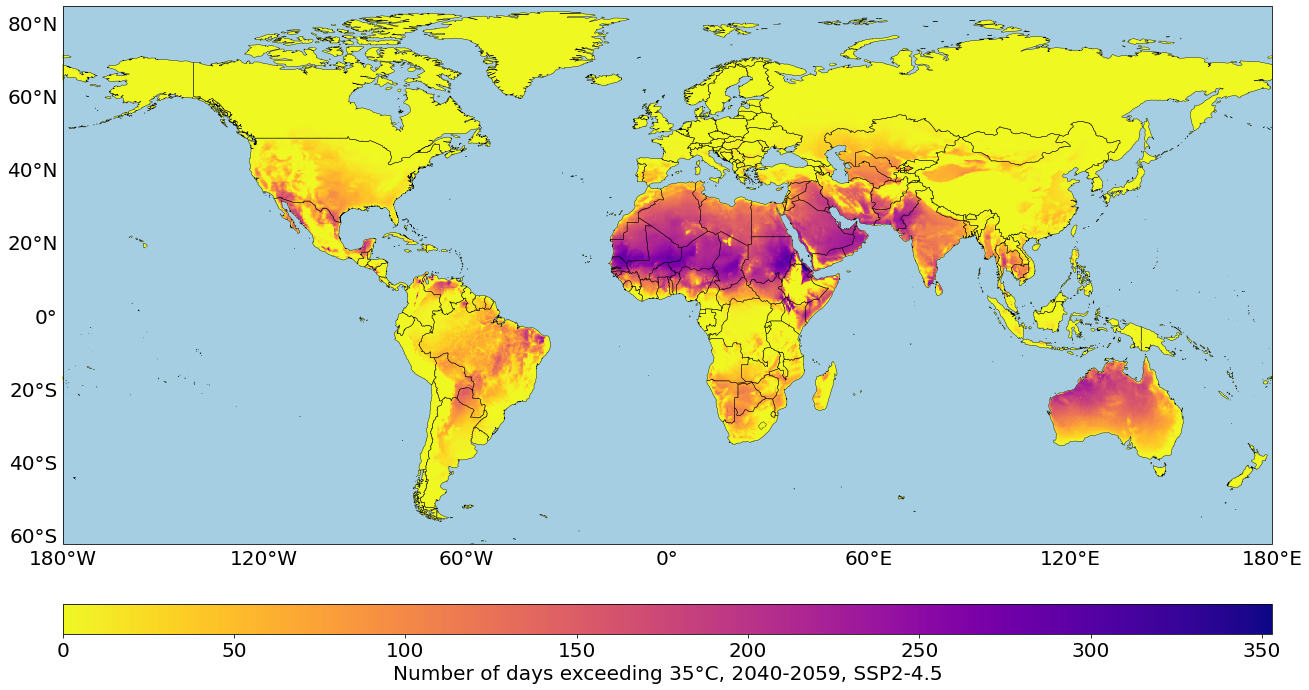

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
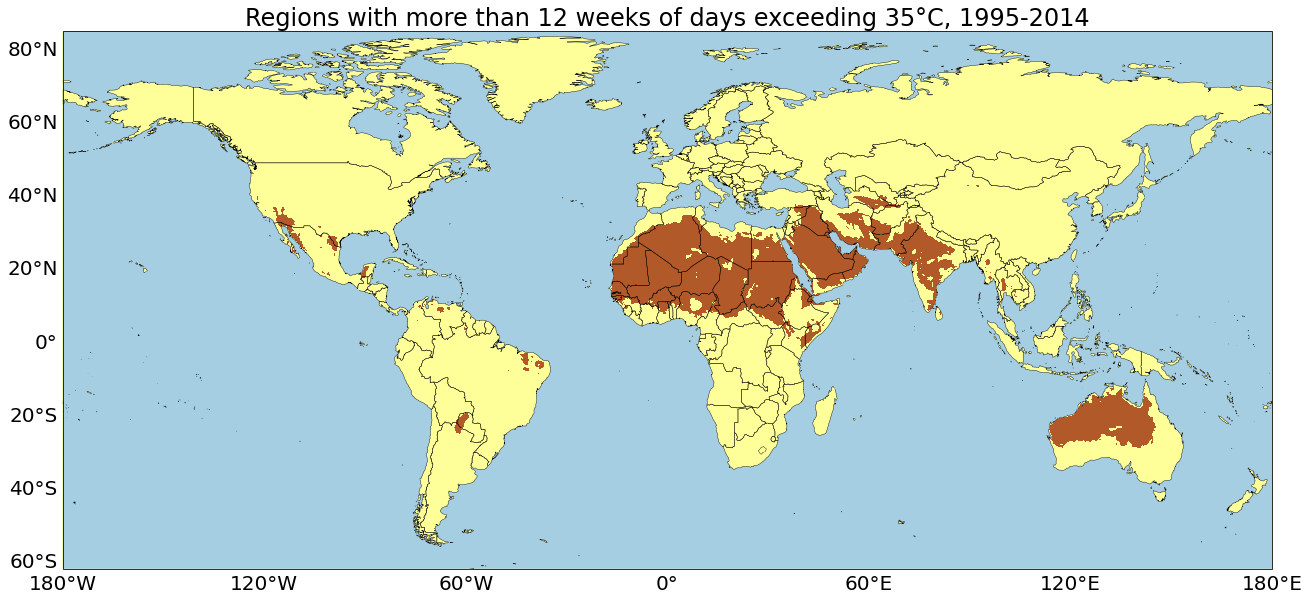

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
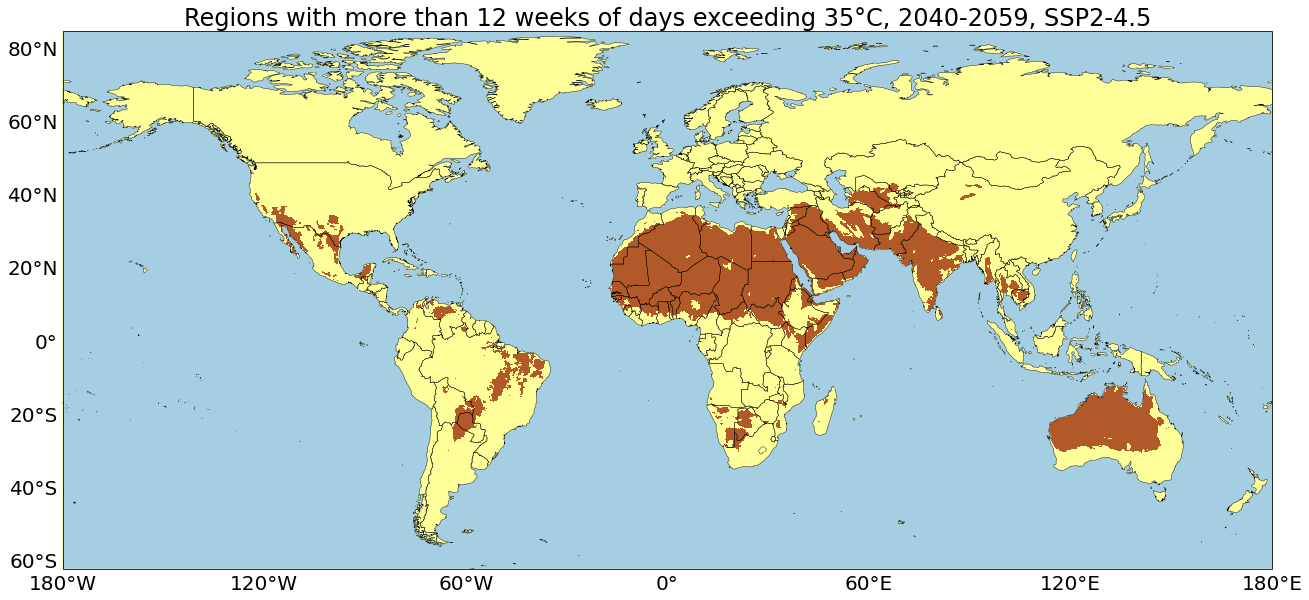

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspot change)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
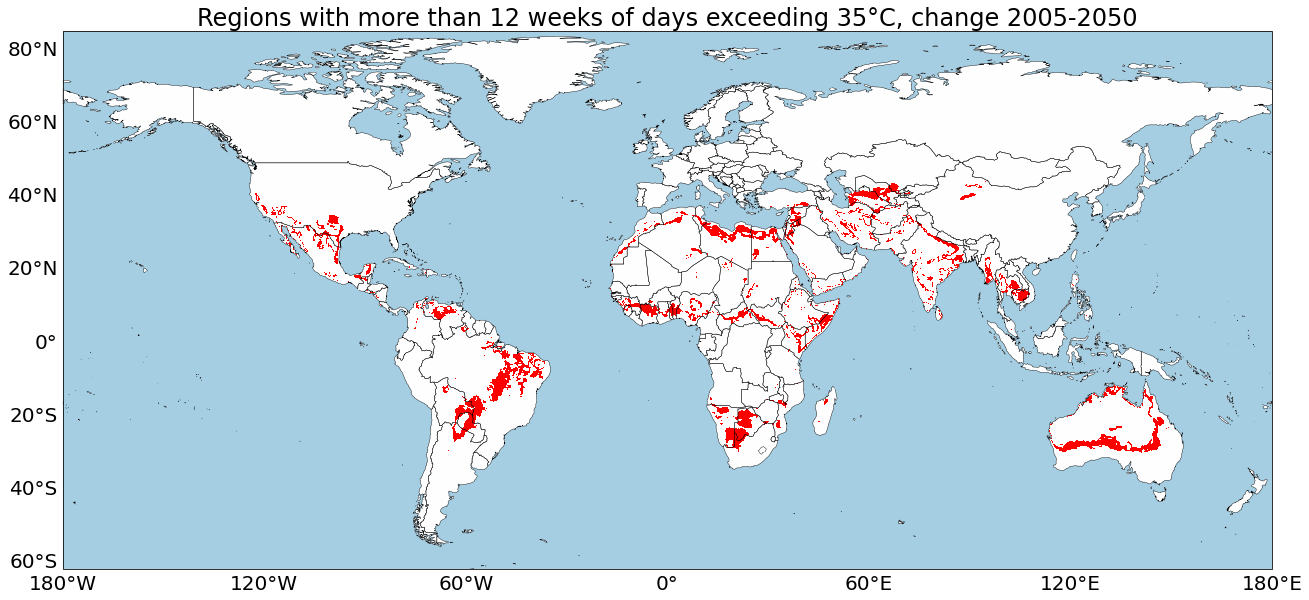

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme heat exposure index)
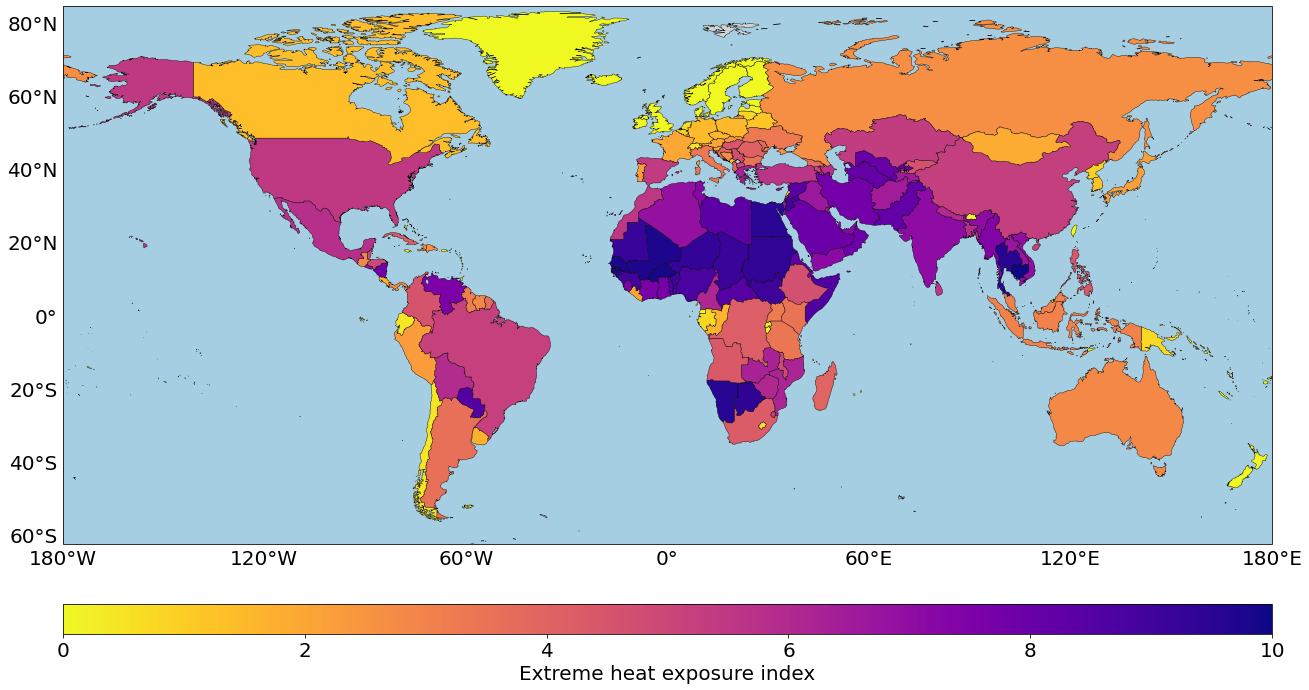

Most exposed countries: Bahrain, Cambodia, Burkina Faso, Senegal, Mali
Most exposed SIDS: Guinea-Bissau, Belize, Cuba, Guyana, Suriname
Most exposed LDC: Cambodia, Burkina Faso, Senegal, Mali, Guinea-Bissau
Most exposed LLDC: Burkina Faso, Mali, Botswana, Niger, Chad


In [7]:
# Índice de temperatura extrema
v = "climatology-hd35-annual-mean"
v_path_h = ( v + "_cmip6-x0.25_ensemble-all-"
    + "historical_climatology_median_1995-2014.nc" )
v_path_f = ( v + "_cmip6-x0.25_ensemble-all-"
    + "ssp245_climatology_median_2040-2059.nc" )
# Umbral de valor extremo
tr = 12*7

# Datos históricos
# Cargamos datos
i = 4
ds_h = xr.open_dataset(wb_path + v_path_h)
ds_h[v] = ds_h[v].isel(time = 0)
ds_h[v] = ds_h[v].astype(float) / 1e9 / 86400
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
# Calculamos la exposición
df_hc, var_h = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 10
ds_f = xr.open_dataset(wb_path + v_path_f)
ds_f[v] = ds_f[v].isel(time = 0)
ds_f[v] = ds_f[v].astype(float) / 1e9 / 86400
var_f = ds_f.drop_vars( ["lon_bnds", "lat_bnds"] ).copy()
# Calculamos la exposición
df_fc, var_f = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[2]
n = 10
indice(v, vn, n, df_hc, df_fc)

# Mapas
vn_plot_1 = "Regions with more than 12 weeks of days exceeding 35°C"
vn_plot_2 = "Number of days exceeding 35°C"
do_map(v, vn, var_h, var_f, vn_plot_1, vn_plot_2, "plasma_r")

# Guardamos los datos en malla
var_h.rename_vars( {v: "Days above 35°C"} ).drop_vars(
    ["time", "bnds", "spatial_ref"] ).to_netcdf(
    "../share/Climate/Extreme_temperature_1995_2014.nc" )
var_f.rename_vars( {v: "Days above 35°C"} ).drop_vars(
    ["time", "bnds", "spatial_ref"] ).to_netcdf(
    "../share/Climate/Extreme_temperature_2040_2059_SSP245.nc" )

# Países más altos
disp = display(vn, n, "Extreme Heat")
disp

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 1-day maximum rainfall as % of annual rainfall, 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
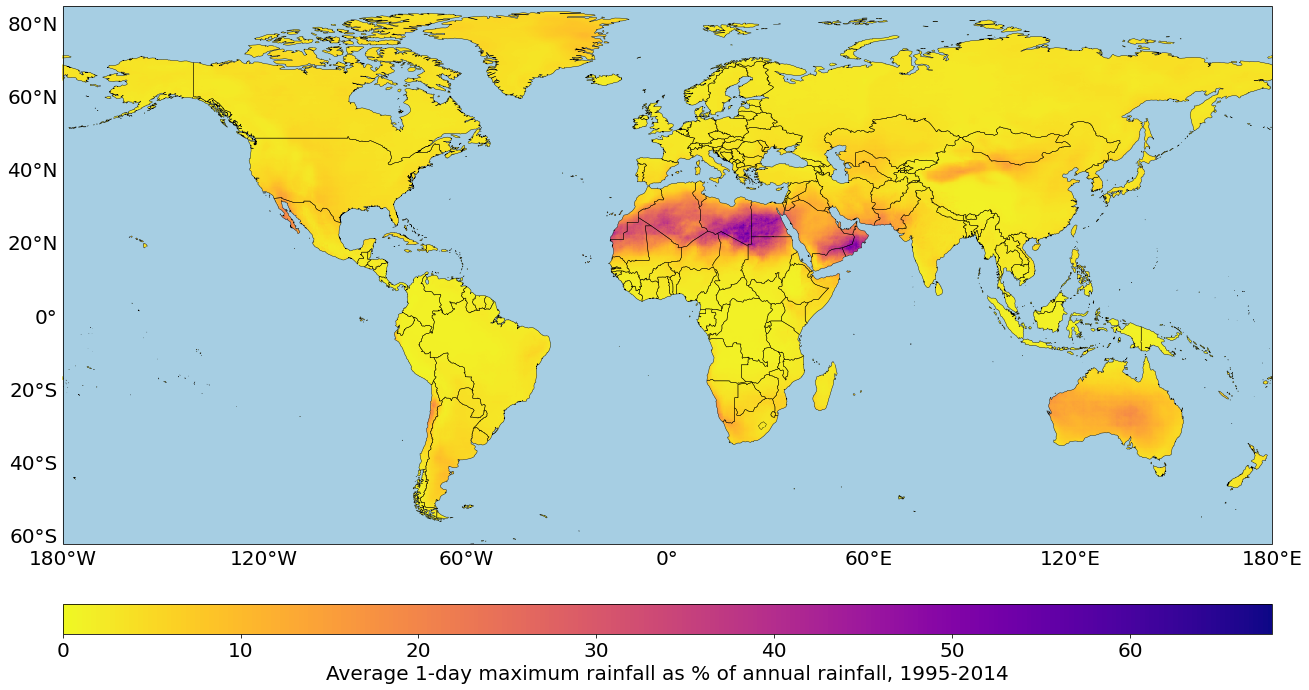

:Overlay
   .Image.I    :Image   [lon,lat]   (Average 1-day maximum rainfall as % of annual rainfall, 2040-2059, SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
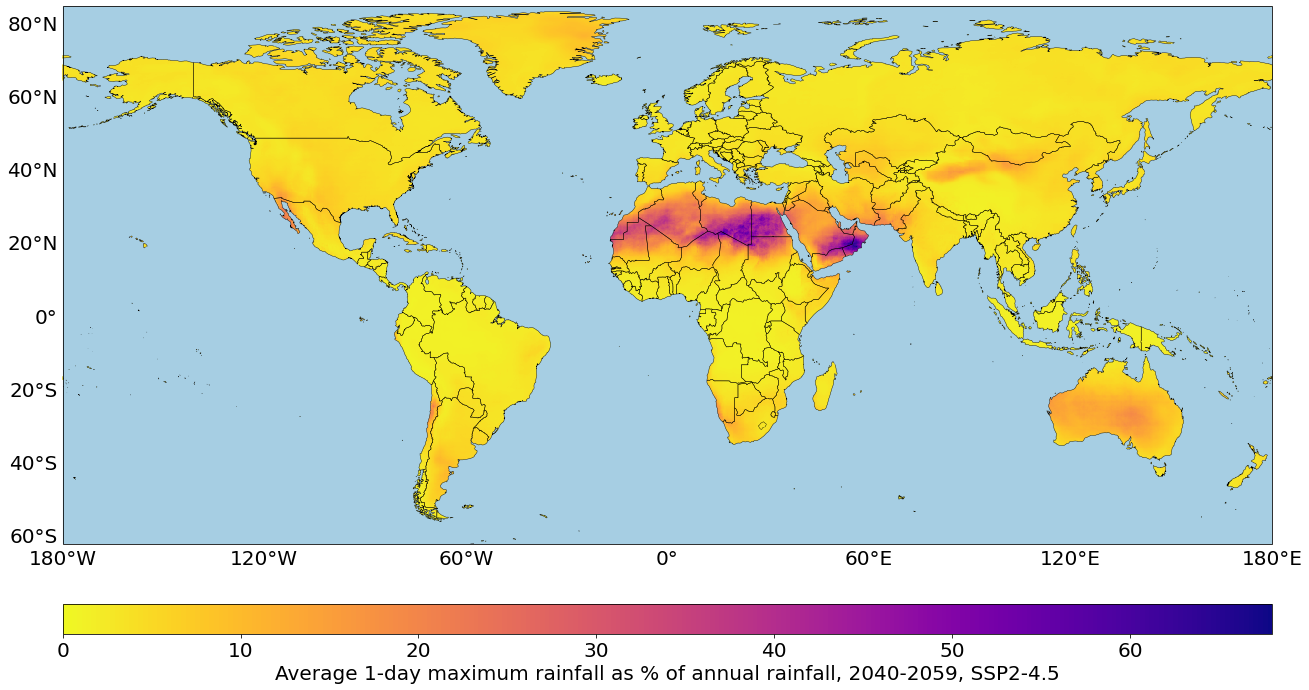

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
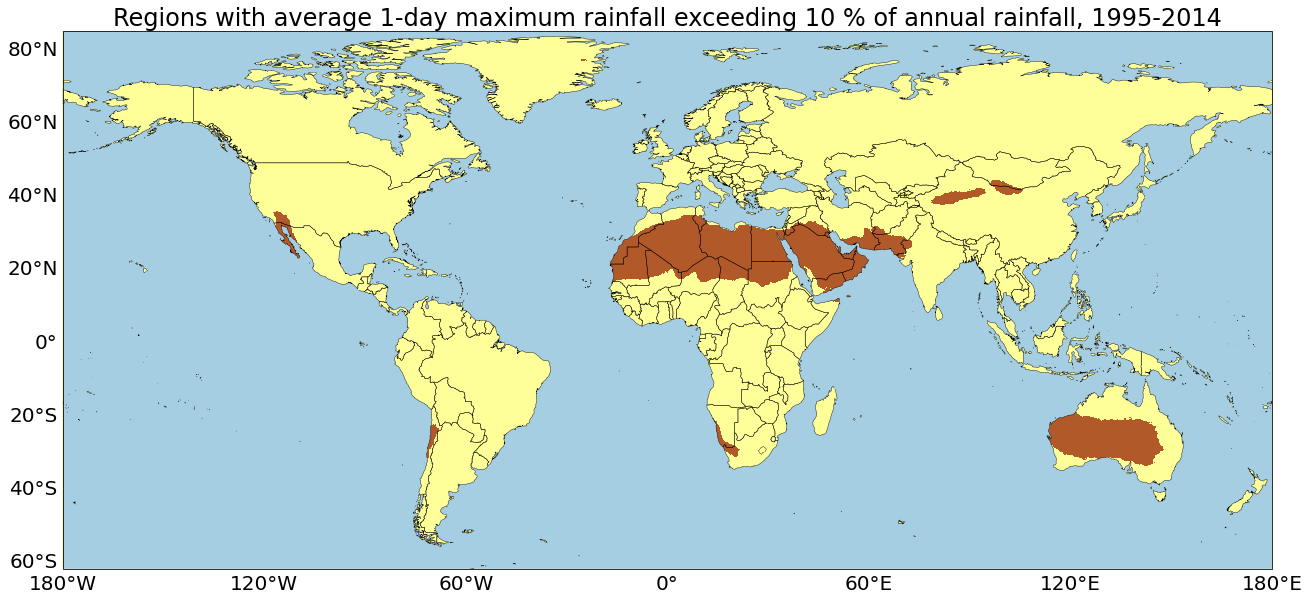

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
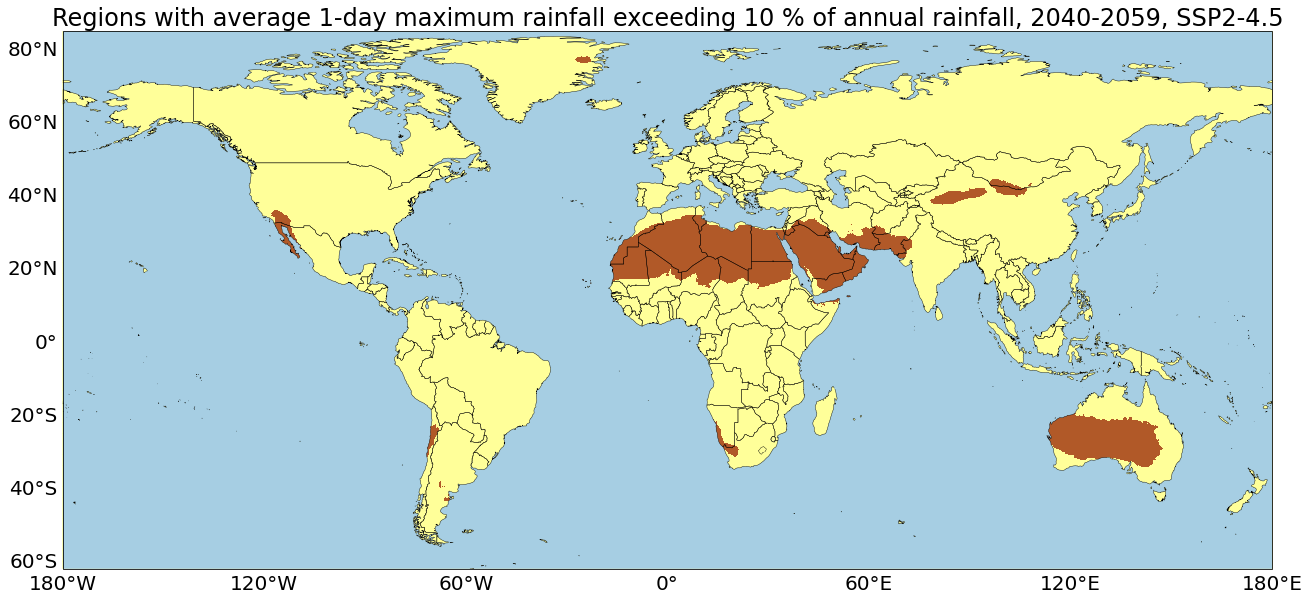

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspot change)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
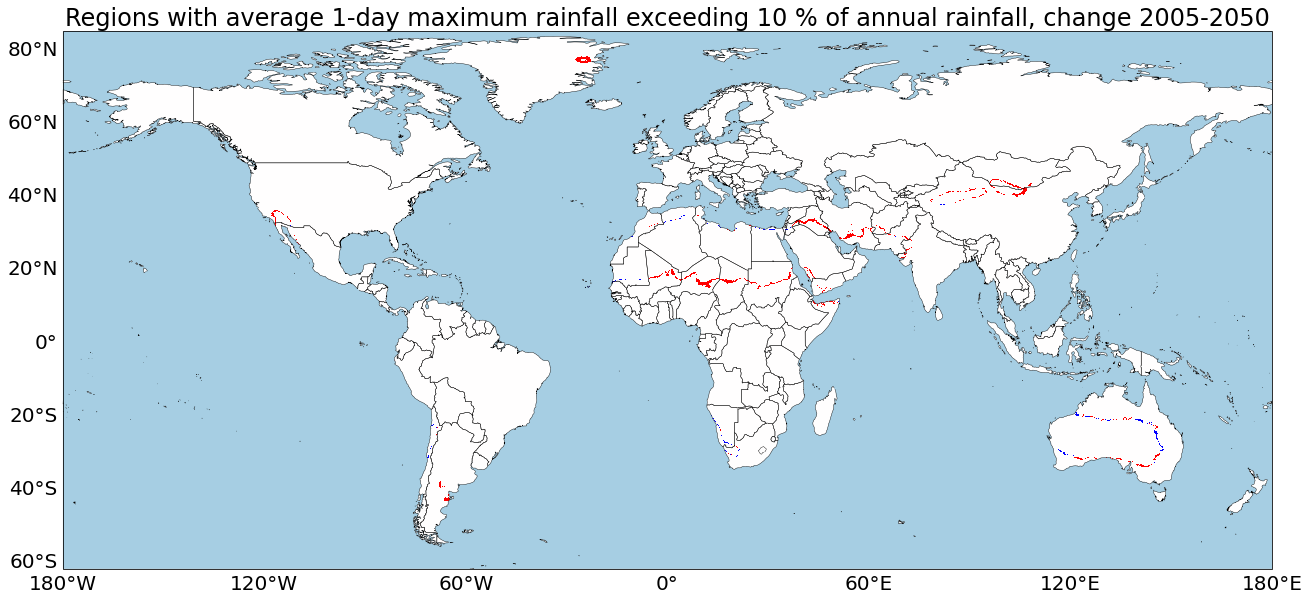

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Extreme rainfall exposure index)
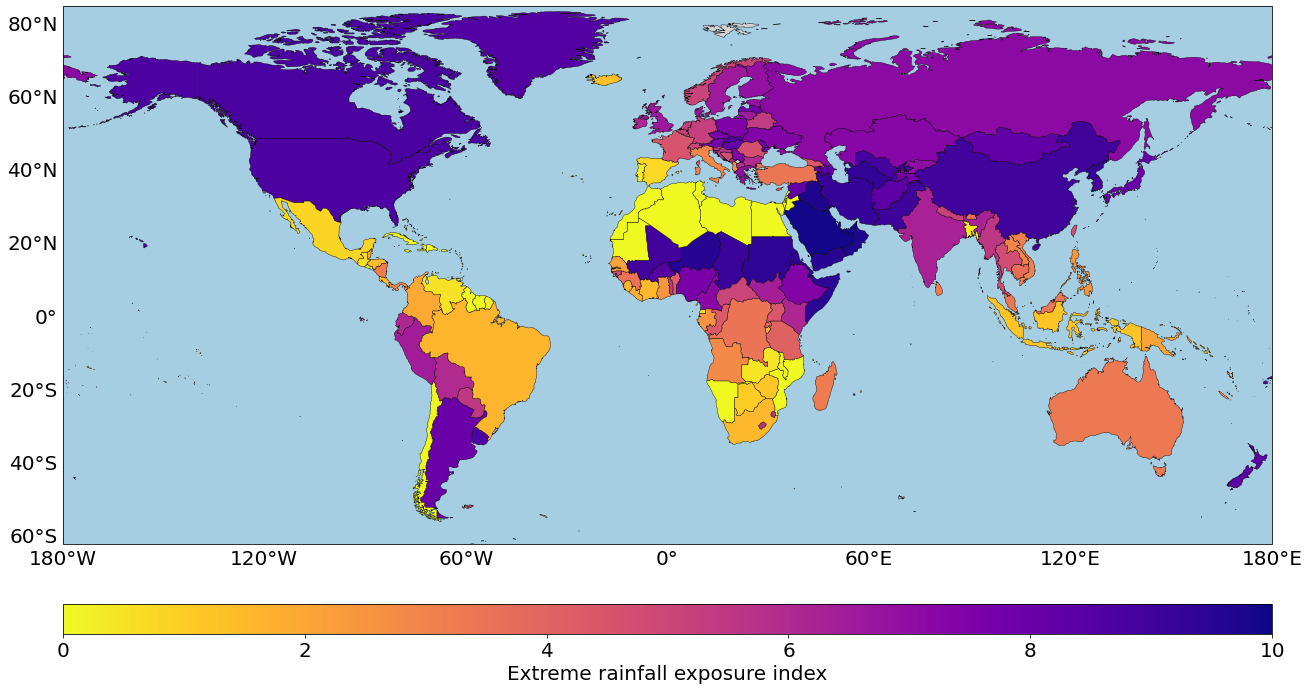

Most exposed countries: Qatar, United Arab Emirates, Saudi Arabia, Bahrain, Kuwait
Most exposed SIDS: Kiribati, Fiji, Nauru, Seychelles, Cayman Islands
Most exposed LDC: Djibouti, Niger, Yemen, Somalia, Sudan
Most exposed LLDC: Niger, Turkmenistan, Chad, Mali, Uzbekistan


In [8]:
# Índice de precipitación extrema
v1 = "climatology-pr-annual-mean"
v2 = "climatology-rx1day-annual-mean"
v = "climatology-percrx1-annual-mean"
v_path_h1 = ( v1 + "_cmip6-x0.25_ensemble-all-"
    + "historical_climatology_median_1995-2014.nc" )
v_path_h2 = ( v2 + "_cmip6-x0.25_ensemble-all-"
    + "historical_climatology_median_1995-2014.nc" )
v_path_f1 = ( v1 + "_cmip6-x0.25_ensemble-all-"
    + "ssp245_climatology_median_2040-2059.nc" )
v_path_f2 = ( v2 + "_cmip6-x0.25_ensemble-all-"
    + "ssp245_climatology_median_2040-2059.nc" )
# Umbral de valor extremo
tr = 10

# Datos históricos
# Cargamos datos
i = 0
ds_h1 = xr.open_dataset(wb_path + v_path_h1)
ds_h1[v1] = ds_h1[v1].isel(time = 0)
i = 13
ds_h2 = xr.open_dataset(wb_path + v_path_h2)
ds_h2[v2] = ds_h2[v2].isel(time = 0)
ds_h = ( ds_h2[v2] / ds_h1[v1] ).to_dataset(name = v) * 100
#ds_h = ds_h2.rename_vars({v2:v}).drop_vars(["lon_bnds", "lat_bnds"])
var_h = ds_h.copy()
# Calculamos la exposición
df_hc, var_h = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Cargamos datos
i = 6
ds_f1 = xr.open_dataset(wb_path + v_path_f1)
ds_f1[v1] = ds_f1[v1].isel(time = 0)
i = 3
ds_f2 = xr.open_dataset(wb_path + v_path_f2)
ds_f2[v2] = ds_f2[v2].isel(time = 0)
ds_f = ( ds_f2[v2] / ds_h1[v1] ).to_dataset(name = v) * 100
#ds_f = ds_f2.rename_vars({v2:v}).drop_vars(["lon_bnds", "lat_bnds"])
var_f = ds_f.copy()
# Calculamos la exposición
df_fc, var_f = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[3]
n = 14
indice(v, vn, n, df_hc, df_fc)

# Mapas
vn_plot_1 = ( "Regions with average 1-day maximum " 
    + "rainfall exceeding 10 % of annual rainfall" )
vn_plot_2 = "Average 1-day maximum rainfall as % of annual rainfall"
do_map(v, vn, var_h, var_f, vn_plot_1, vn_plot_2, "plasma_r")

# Guardamos los datos en malla
var_h.rename_vars( {v: "1 day maximum rainfall as % of annual"} ).drop_vars(
    ["spatial_ref"] ).to_netcdf(
    "../share/Climate/Extreme_rainfall_1995_2014.nc" )
var_f.rename_vars( {v: "1 day maximum rainfall as % of annual"} ).drop_vars(
    ["spatial_ref"] ).to_netcdf(
    "../share/Climate/Extreme_rainfall_2040_2059_SSP245.nc")

# Países más altos
disp = display(vn, n, "Extreme rainfall")
disp

:Overlay
   .Image.I    :Image   [lon,lat]   (Hurricane wind, 100-year return period [km/h], 1995-2014)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
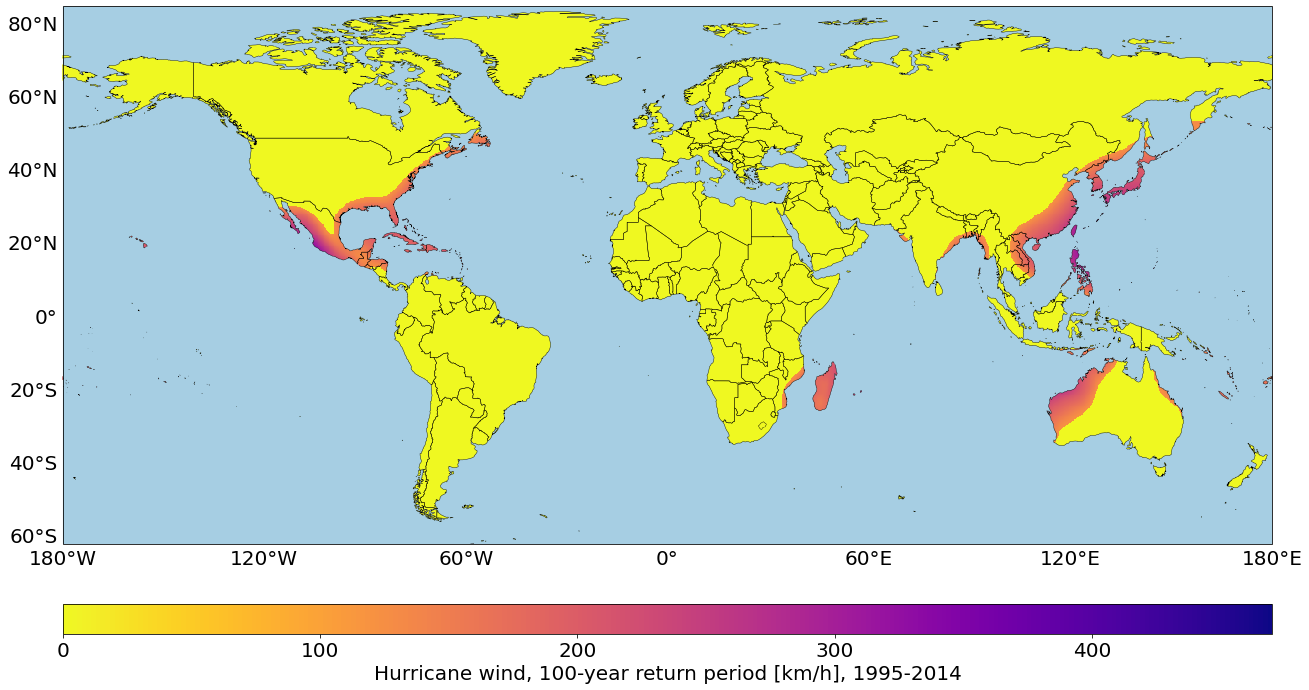

:Overlay
   .Image.I    :Image   [lon,lat]   (Hurricane wind, 100-year return period [km/h], 2040-2059, SSP2-4.5)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
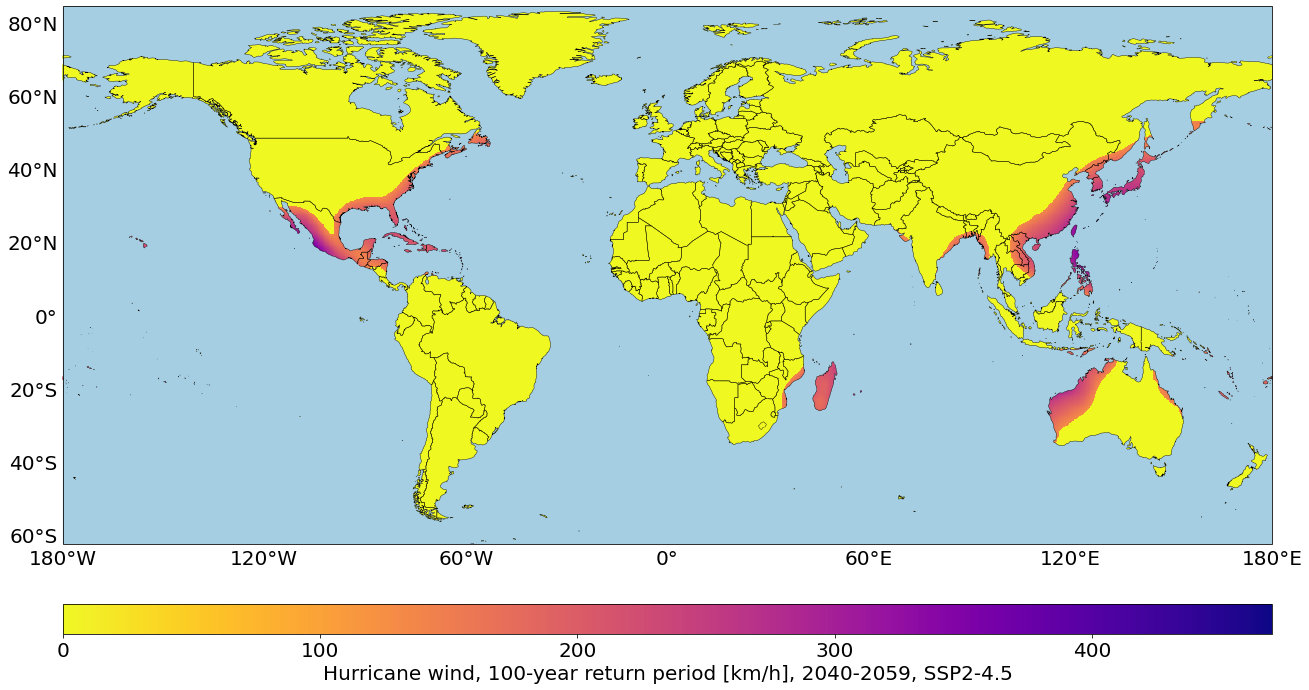

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
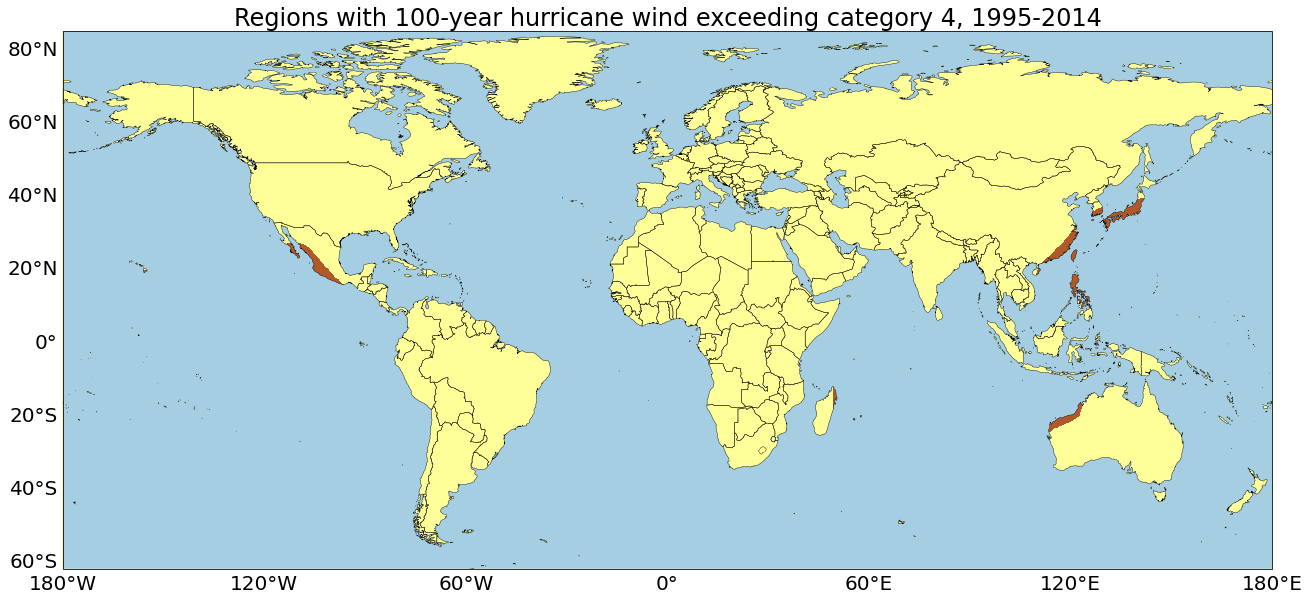

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspots)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
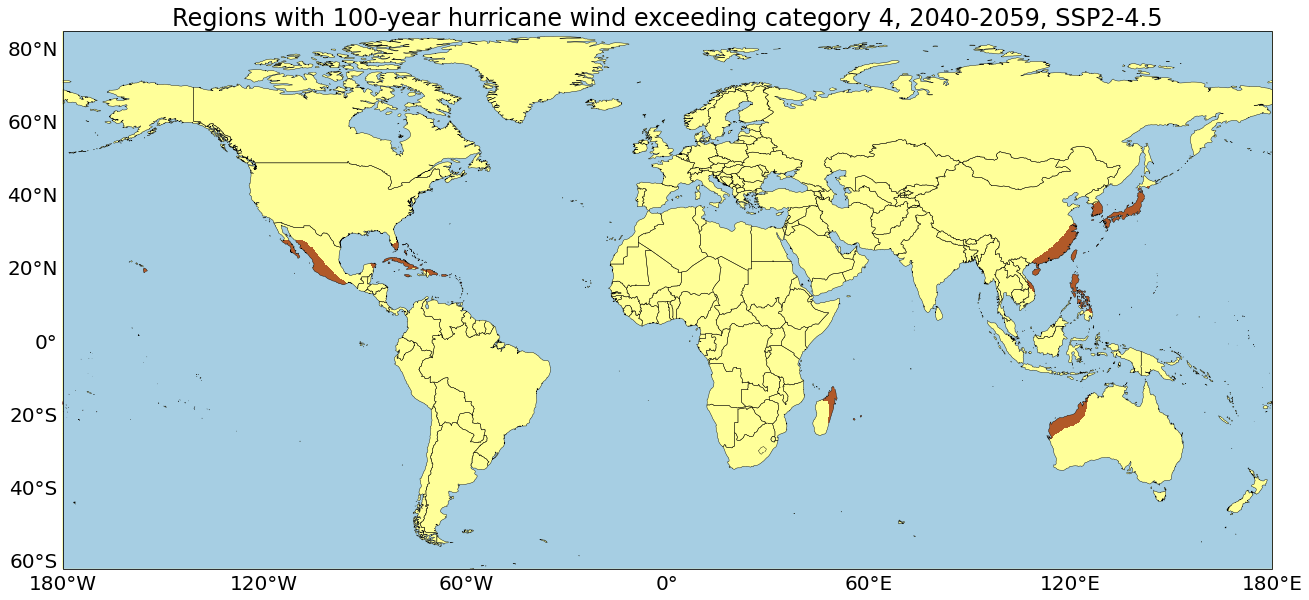

:Overlay
   .Image.I    :Image   [lon,lat]   (Hotspot change)
   .Polygons.I :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I     :Path   [Longitude,Latitude]
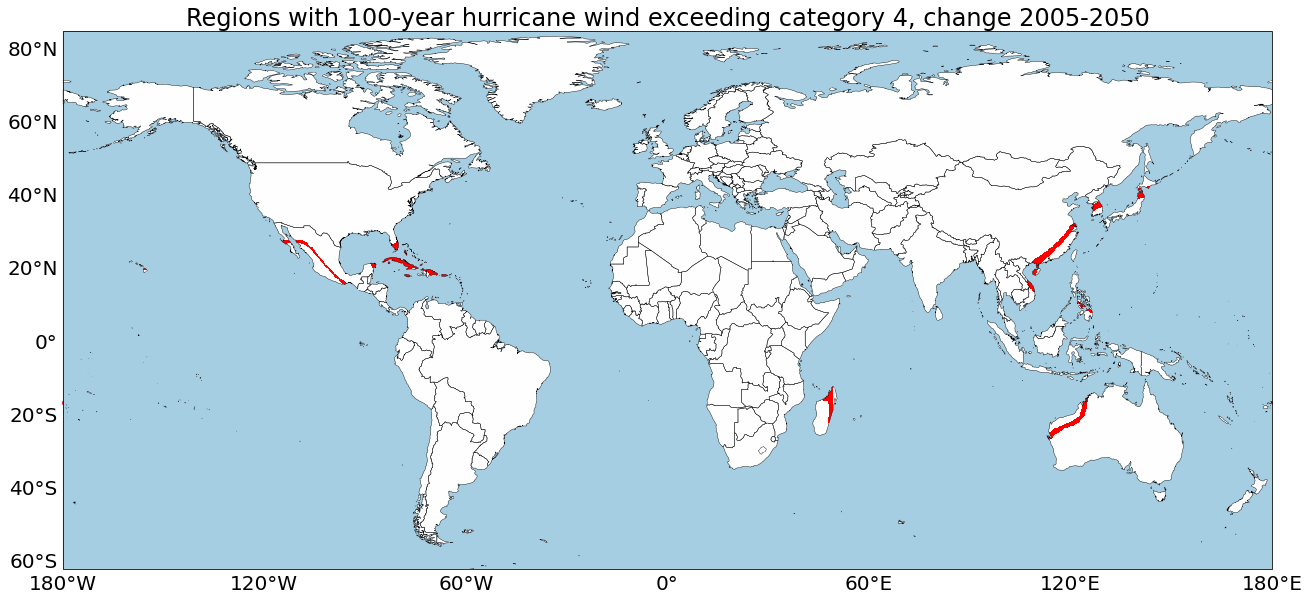

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Hurricane exposure index)
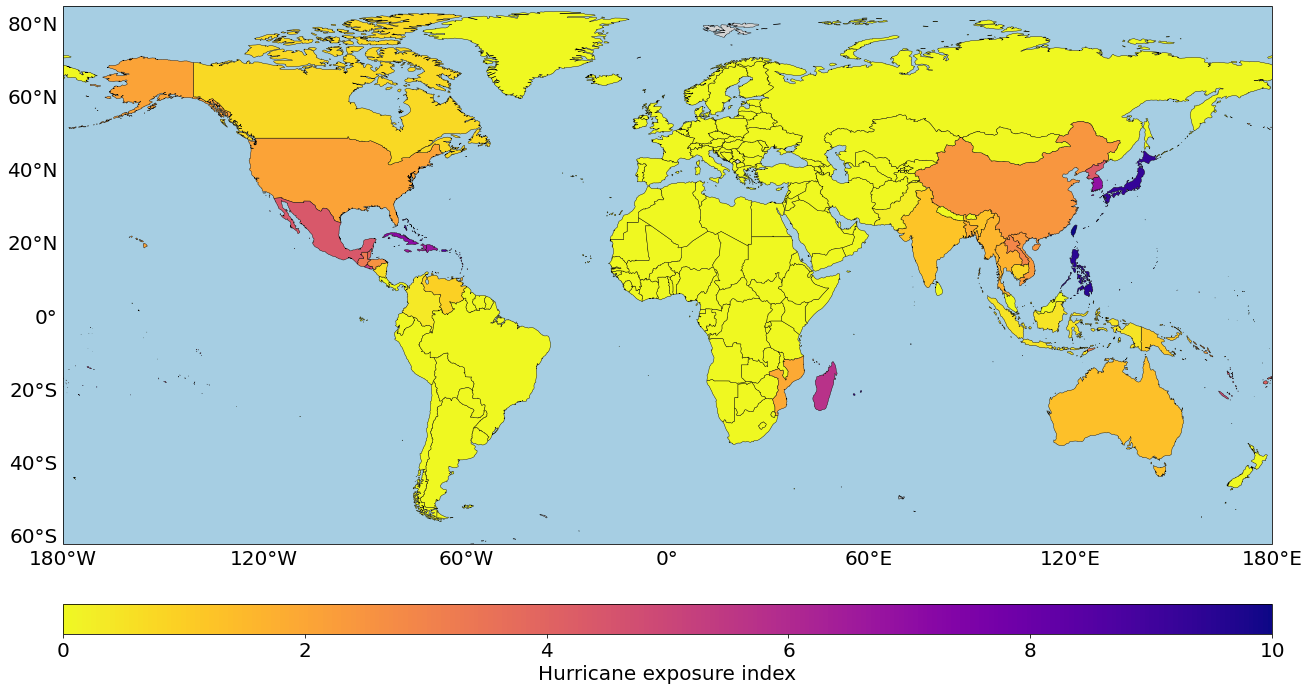

Most exposed countries: Taiwan, Province of China, Northern Mariana Islands, Guam, Mauritius, Philippines
Most exposed SIDS: Northern Mariana Islands, Guam, Mauritius, Bahamas, Virgin Islands (British)
Most exposed LDC: Haiti, Timor-Leste, Lao People's Democratic Republic, Comoros, Solomon Islands
Most exposed LLDC: Lao People's Democratic Republic, Afghanistan, Mali, Zambia, Uzbekistan


In [9]:
# Índice de huracanes
v = "100_year_hurricane_wind"
# Umbral de valor extremo
tr = 209

# Datos históricos
# Cargamos datos
f = "../../Bases_de_datos/GAR2015/VIENTO_MUNDO_TR100_INT1.grd"
hurr = rio.open_rasterio(f).to_dataset( "band"
    ).rename( {"x": "lon", "y": "lat", 1: v})
hurr = hurr.where(hurr >= 119, 0)
# Interpolamos datos para hacer coincidir mallas
regridder = xe.Regridder( hurr, pop_h, method = "bilinear", )#periodic = True )
var_h = regridder( hurr, keep_attrs = True )
# DAtos futuros
var_f = var_h * 1.1
var_h = var_h.where(var_h >= 119, 0)
var_f = var_f.where(var_f >= 119, 0)
# Calculamos la exposición
df_hc, var_h = exposicion(v, tr, var_h, pop_h, df_pop_h)

# Datos futuros
# Calculamos la exposición
df_fc, var_f  = exposicion(v, tr, var_f, pop_f, df_pop_f)

# Cálculo del índice
vn = index_n[4]
n = 18
indice(v, vn, 18, df_hc, df_fc)

# Mapas
vn_plot_1 = "Regions with 100-year hurricane wind exceeding category 4"
vn_plot_2 = "Hurricane wind, 100-year return period [km/h]"
do_map(v, vn, var_h, var_f, vn_plot_1, vn_plot_2, "plasma_r")

# Guardamos los datos en malla
var_h.rename_vars( {v: "100-year hurricane wind"} ).drop_vars(
    ["spatial_ref"] ).to_netcdf(
    "../share/Climate/Hurricane_1995_2014.nc" )
var_f.rename_vars( {v: "100-year hurricane wind"} ).drop_vars(
    ["spatial_ref"] ).to_netcdf(
    "../share/Climate/Hurricane_2040_2059_SSP245.nc" )

# Países más altos
disp = display(vn, n, "Extreme rainfall")
disp

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
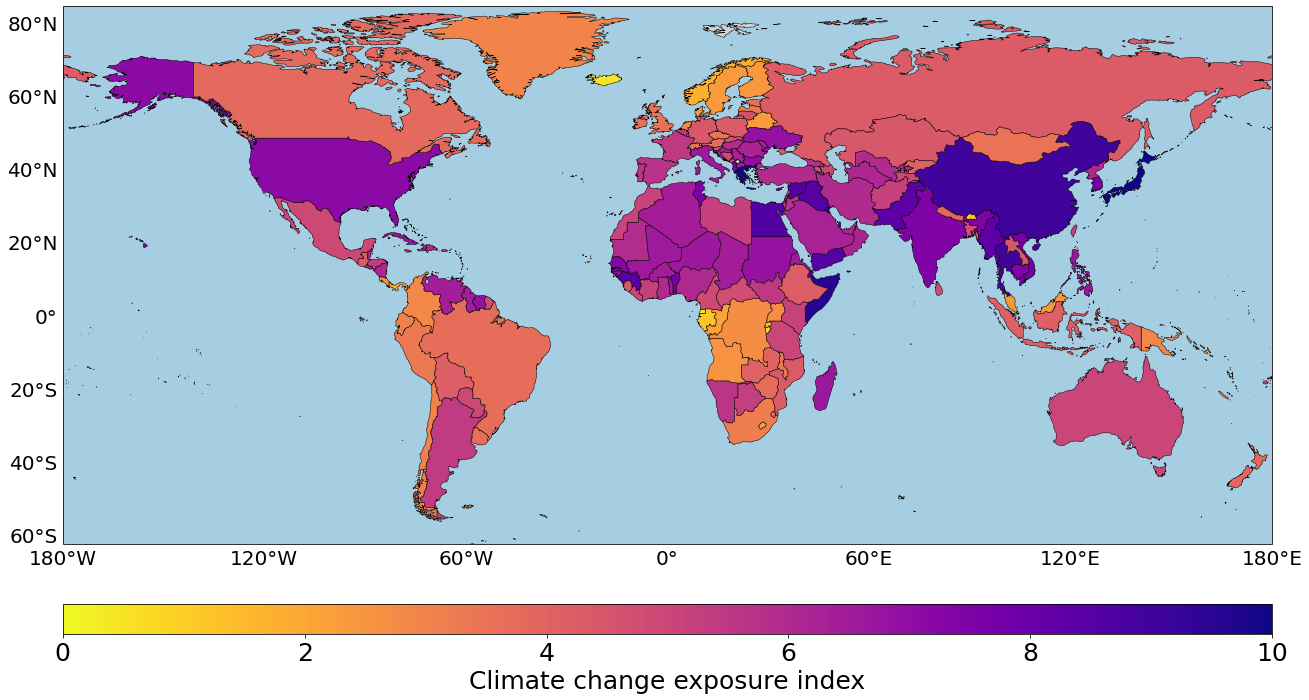

Most exposed countries: Japan, Greece, Bahrain, Somalia, Kuwait
Most exposed SIDS: Montserrat, Anguilla, Guadeloupe, Antigua and Barbuda, Dominica
Most exposed LDC: Somalia, Yemen, Guinea, Djibouti, Myanmar
Most exposed LLDC: Niger, Mali, North Macedonia, Chad, Burkina Faso


In [10]:
# Índice de exposición al cambio climático

# Calculamos el índice
vn = index_n[5]
df_iso[vn] = df_iso[index_n[:-1]].mean(axis = 1)

# Normalización 0-10
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * (df_iso[vn] - min_v ) / rng_v
# Ajustamos islas pequeñas como San Martín
#df_iso.loc["SXM", ["name"] + index_n] = df_iso.loc["MAF", ["name"] + index_n]

# Mapa
borders[vn] = df_iso[vn]
map_v = gv.Polygons( borders, vdims = vn ).opts( linewidth = 0.5,
    cmap = "plasma_r", aspect = 2, fontscale = 2.5, **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Guardamos los valores
df_iso[index_n + c_names].to_csv("../share/Indexes/climate_index.csv")

## 10 países más altos
#df_iso[["name"] + index_n].sort_values( vn, ascending = False ).head(10)

# Países más altos
disp = display(vn, n, "", "climate")
disp

In [11]:
# Información para uno o varios países en específico
country = ["BRA", "COL"]

disp = df_iso.loc[country, ["name"] + index_n + c_names].T
# Promedio
disp.iloc[1:7].mean(axis = 1)
# Detalle
#disp

Sea level rise exposure index     0.8
Drought exposure index            1.7
Extreme heat exposure index       4.9
Extreme rainfall exposure index   1.8
Hurricane exposure index          0.2
Climate change exposure index     3.3
dtype: object

In [12]:
# Conjuntos de países de la NDC

# NDC Assessment
country = ["BTN", "CRI", "ETH", "KEN", "MAR", "NPL", "NGA", "GMB"]
country = ["DEU", "CHL", "NOR", "PER"]
country = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', "SWE",
    'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', "IND",
    "JPN", "ZAF", "GBR", "EGY", "KAZ", "PHL", "COL", "USA"]
country = ["RUS", "CAN", "CHN", "BRA", "NZL", "MEX", "KOR", "ARG", "SGP"]
country = ["IDN", "IRN", "SAU", "TUR", "VNM", "THA", "ARE"]
country = ["BRA", "COL"]

# Net Zero Targets
country = ["CRI"]
country = ["CHL"]
country = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'SWE',
    'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'COL', "GBR"]
country = ["DEU", "CHL", "PER"]
country = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'SWE',
    'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
    'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'COL', "GBR",
    "USA", "KAZ", "SWE", "ZAF", "IND", "JPN", "AUS"]
country = ["CAN", "KOR", "BRA", "RUS", "CHN", "NZL", "ARG", "SGP"]
country = ["VNM", "THA", "ARE", "IDN", "SAU", "TUR"]


In [13]:
# Cantidad de categorías de exposición.
df_iso["Categories"] = df_iso[index_n[:-1]].where(
    df_iso[index_n[:-1]] > 0, np.nan ).count(axis = 1)
# 10 países más altos
df_iso.loc[ df_iso["Categories"] >= 5, ["name", "Categories"] + index_n
    ].sort_values( "Categories", ascending = False ).head(5)

name  Categories  Sea level rise exposure index  \
ISO_A3                                                          
AUS      Australia           5                            1.6   
COL       Colombia           5                            0.2   
MDG     Madagascar           5                            3.6   

        Drought exposure index  Extreme heat exposure index  \
ISO_A3                                                        
AUS                        5.2                          2.8   
COL                        1.1                          4.5   
MDG                        2.4                          4.0   

        Extreme rainfall exposure index  Hurricane exposure index  \
ISO_A3                                                              
AUS                                 3.3                       1.3   
COL                                 1.9                       0.4   
MDG                                 3.2                       5.7   

        Climate change exposure index  
ISO_A3                                 
AUS                               5.0  
COL                               2.8  
MDG                               6.7

In [14]:
# Cantidad de categorías de exposición.
df_iso["Categories"] = df_iso[index_n[:-1]].where(
    df_iso[index_n[:-1]] >= 7.5, np.nan ).count(axis = 1)
# 10 países más altos
df_iso.loc[ df_iso["Categories"] >= 3, ["name", "Categories"] + index_n
    ].sort_values( "Categories", ascending = False ).head(15)

name  Categories  Sea level rise exposure index  \
ISO_A3                                                        
AIA     Anguilla           3                            9.3   
BHR      Bahrain           3                            8.0   
JPN        Japan           3                            8.9   
SOM      Somalia           3                            9.2   

        Drought exposure index  Extreme heat exposure index  \
ISO_A3                                                        
AIA                        7.9                          0.0   
BHR                        0.0                         10.0   
JPN                        0.0                          2.2   
SOM                        0.0                          8.6   

        Extreme rainfall exposure index  Hurricane exposure index  \
ISO_A3                                                              
AIA                                 0.0                       7.7   
BHR                                 9.8                       0.0   
JPN                                 8.1                       9.3   
SOM                                 9.5                       0.0   

        Climate change exposure index  
ISO_A3                                 
AIA                               8.7  
BHR                               9.8  
JPN                              10.0  
SOM                               9.6